# Time Series Forecasting of Water Levels


In [138]:
# Import libraries for data manipulation, analysis, and visualization
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

# Import datetime library for working with dates and times
import datetime

# Ignore warning messages for cleaner output
import warnings
warnings.filterwarnings('ignore')

# Show all Columns
pd.set_option('display.max_columns', None)


## 1. Define the problem and goals
Make model to predict the water level (TMA) at monitoring points Katulampa, Depok, and Manggarai for the next 6 hours.


## 2. Collect, Explore and clean the data
Provided with rainfall sensor data and water level (TMA) along the Ciliwung river during the 2021-2022 period as training data. Rainfall sensor and TMA data are recorded every 1 hour. The data was obtained from the Jakarta Provincial Government.

The provided data is not perfect. Therefore, let's clean up the data.


In [139]:
# Read the Excel file and store it in a DataFrame object
data_rainfall = pd.read_excel('train_Curah hujan 2021-2022.xlsx')
data_waterlevel = pd.read_excel('train_TMA Ciliwung 2021-2022.xlsx')

In [140]:
# Sort it based on the 'Waktu' column
data_waterlevel = data_waterlevel.sort_values('Waktu')

# Sort it based on the 'Waktu' column
data_rainfall = data_rainfall.sort_values('Waktu')

In [141]:
data_rainfall.head()

Pos Pantau               Waktu  Intensitas
153249  Pasar Ikan 2021-01-01 07:00:00          36
101374   Manggarai 2021-01-01 07:00:00           0
28392     Ciganjur 2021-01-01 07:00:00           0
195045       Pluit 2021-01-01 07:00:00           0
76760    Katulampa 2021-01-01 07:00:00           0

In [142]:
data_waterlevel.head()

Waktu     Pintu Air  Tinggi Air
0 2021-01-01 01:00:00         Depok        82.0
1 2021-01-01 01:00:00     Katulampa        27.0
2 2021-01-01 01:00:00     Manggarai       530.0
3 2021-01-01 01:00:00     Manggarai       528.0
4 2021-01-01 01:00:00  Marina Ancol       165.0

In [143]:
# Print the shape of the rainfall and water level data
print("Rainfall data shape:", data_rainfall.shape)
print("Water level data shape:", data_waterlevel.shape)

Rainfall data shape: (211238, 3)
Water level data shape: (72068, 3)


In [144]:
data_rainfall.info()

<class 'pandas.core.frame.DataFrame'>
Index: 211238 entries, 153249 to 211237
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Pos Pantau  211238 non-null  object        
 1   Waktu       211238 non-null  datetime64[ns]
 2   Intensitas  211238 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 6.4+ MB


In [145]:
data_waterlevel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72068 entries, 0 to 72067
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Waktu       72068 non-null  datetime64[ns]
 1   Pintu Air   72068 non-null  object        
 2   Tinggi Air  69530 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 2.2+ MB


In [146]:
# See the nan value in rainfall data
data_rainfall.isnull().sum()

Pos Pantau    0
Waktu         0
Intensitas    0
dtype: int64

In [147]:
# See the nan value in water level data
data_waterlevel.isnull().sum()

Waktu            0
Pintu Air        0
Tinggi Air    2538
dtype: int64

In [148]:
# Drop the nan value in water level data
data_waterlevel = data_waterlevel.dropna()

In [149]:
# Count the number of duplicated rows based on the 'Waktu' and 'Pintu Air'
num_waterlevel = data_waterlevel.duplicated(['Waktu', 'Pintu Air']).sum()

# Print the number of duplicated rows
print("Number of duplicated rows in Water Level Data:", num_waterlevel)

# Check for duplicated data based on the 'Waktu' and 'Pos Pantau' columns
num_rainfall = data_rainfall.duplicated(['Waktu', 'Pos Pantau']).sum()

# Print the duplicated data
print("Number of duplicated rows in Rainfall Data:", num_rainfall)

Number of duplicated rows in Water Level Data: 1992
Number of duplicated rows in Rainfall Data: 0


In [150]:
# Drop the duplicated rows in water level data
data_waterlevel = data_waterlevel.drop_duplicates(['Waktu', 'Pintu Air'])

In [151]:
# See the unique values in the 'Pintu Air' column
data_waterlevel['Pintu Air'].unique()

array(['Depok', 'Katulampa', 'Manggarai', 'Marina Ancol'], dtype=object)

In [152]:
# See the unique values in the 'Pos Pantau' column
data_rainfall['Pos Pantau'].unique()

array(['Pasar Ikan', 'Manggarai', 'Ciganjur', 'Pluit', 'Katulampa',
       'Marina Ancol', 'Depok', 'Balekambang', 'Jembatan Merah',
       'Pasar Minggu', 'Bojong Murni', 'Pekayon', 'Megamendung',
       'Pancoran Mas', 'Cilangkap', 'Pela Mampang', 'Bukit Duri',
       'Mampang Prapatan'], dtype=object)


## 3. Visualize the data
In data analysis, there are two important steps. First, we look at the data using pictures and graphs to find patterns and trends. Then, we use numbers and math to understand the data better. These steps help us learn useful things from the data.


### Water Level per Month

In [153]:
# Make a copy of the water level data
waterLevelPerMonth = data_waterlevel.copy()

# Format the dates in the Month column to include both month and year
waterLevelPerMonth['Month'] = data_waterlevel['Waktu'].dt.strftime('%b %Y')

# convert the 'Month' column to datetime64
waterLevelPerMonth['Month'] = pd.to_datetime(waterLevelPerMonth['Month'])

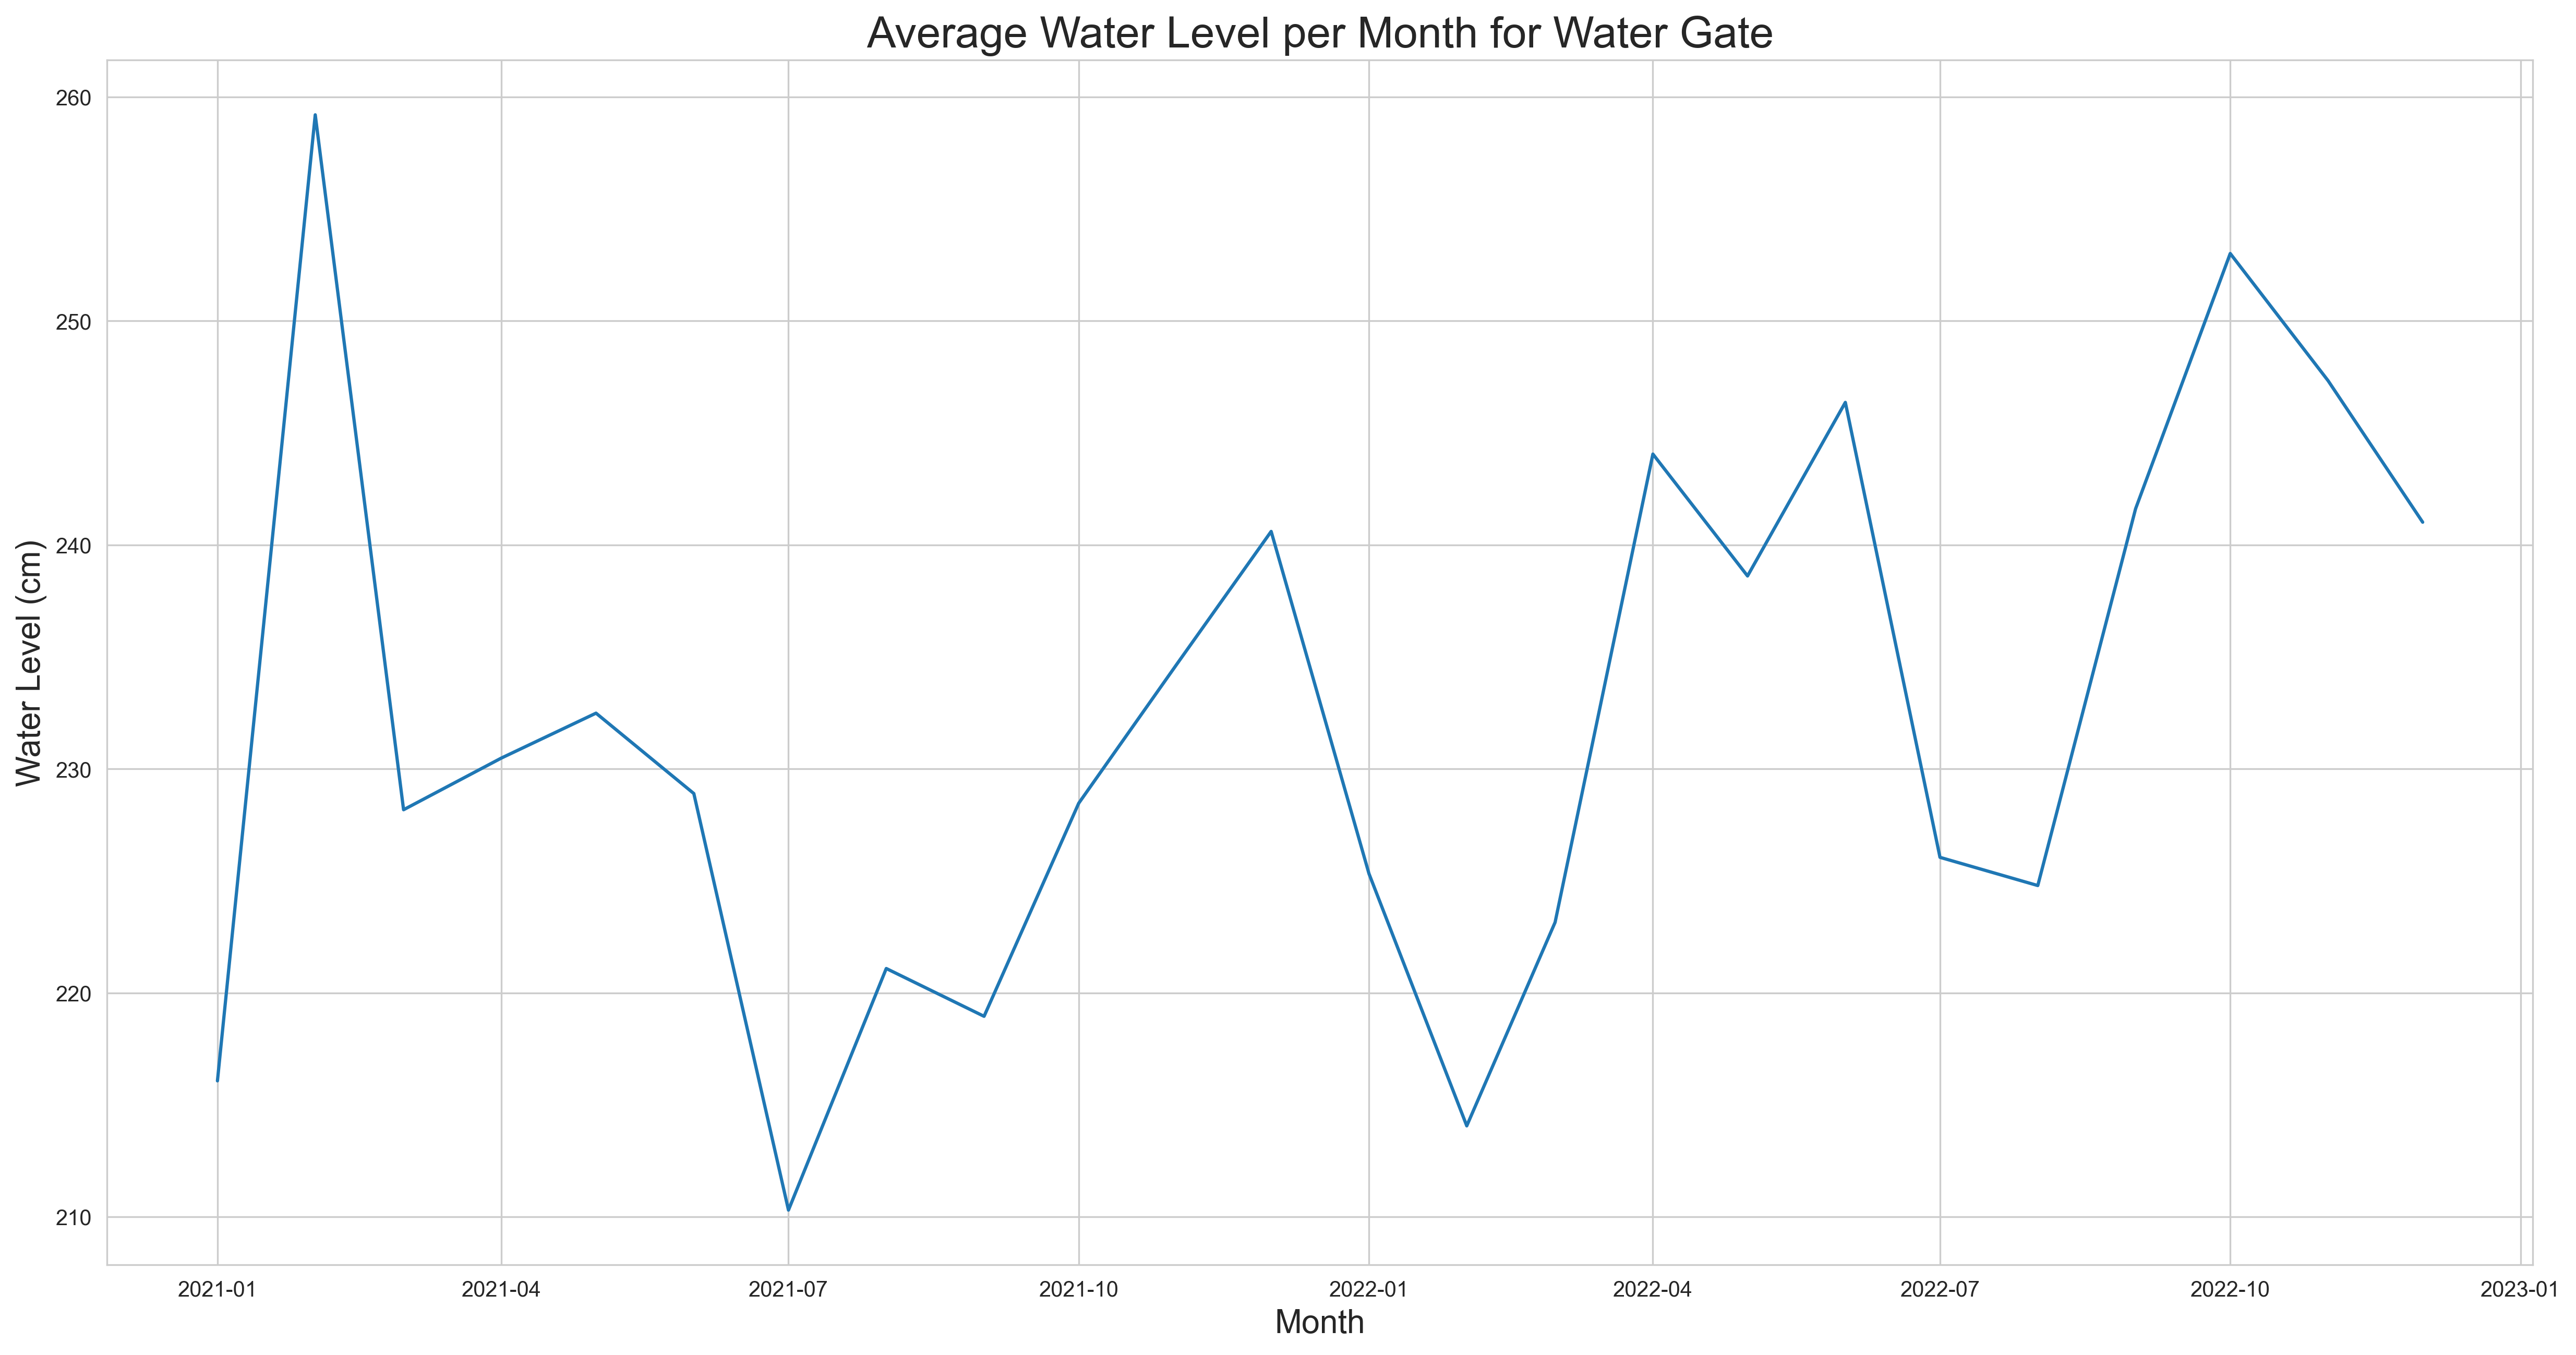

In [154]:
# Group the water level data by month and calculate the mean Tinggi Air for all stations
meanWaterLevelPerMonth = waterLevelPerMonth.groupby('Month')['Tinggi Air'].mean().reset_index()

# Create a line graph of the mean water level data for all stations
plt.figure(figsize=(20,10), dpi=300)
sns.set_style("whitegrid")
sns.lineplot(x='Month', y='Tinggi Air', data=meanWaterLevelPerMonth)
plt.title('Average Water Level per Month for Water Gate', fontsize=20)
plt.xlabel('Month', fontsize=15)
plt.ylabel('Water Level (cm)', fontsize=15)
plt.show()

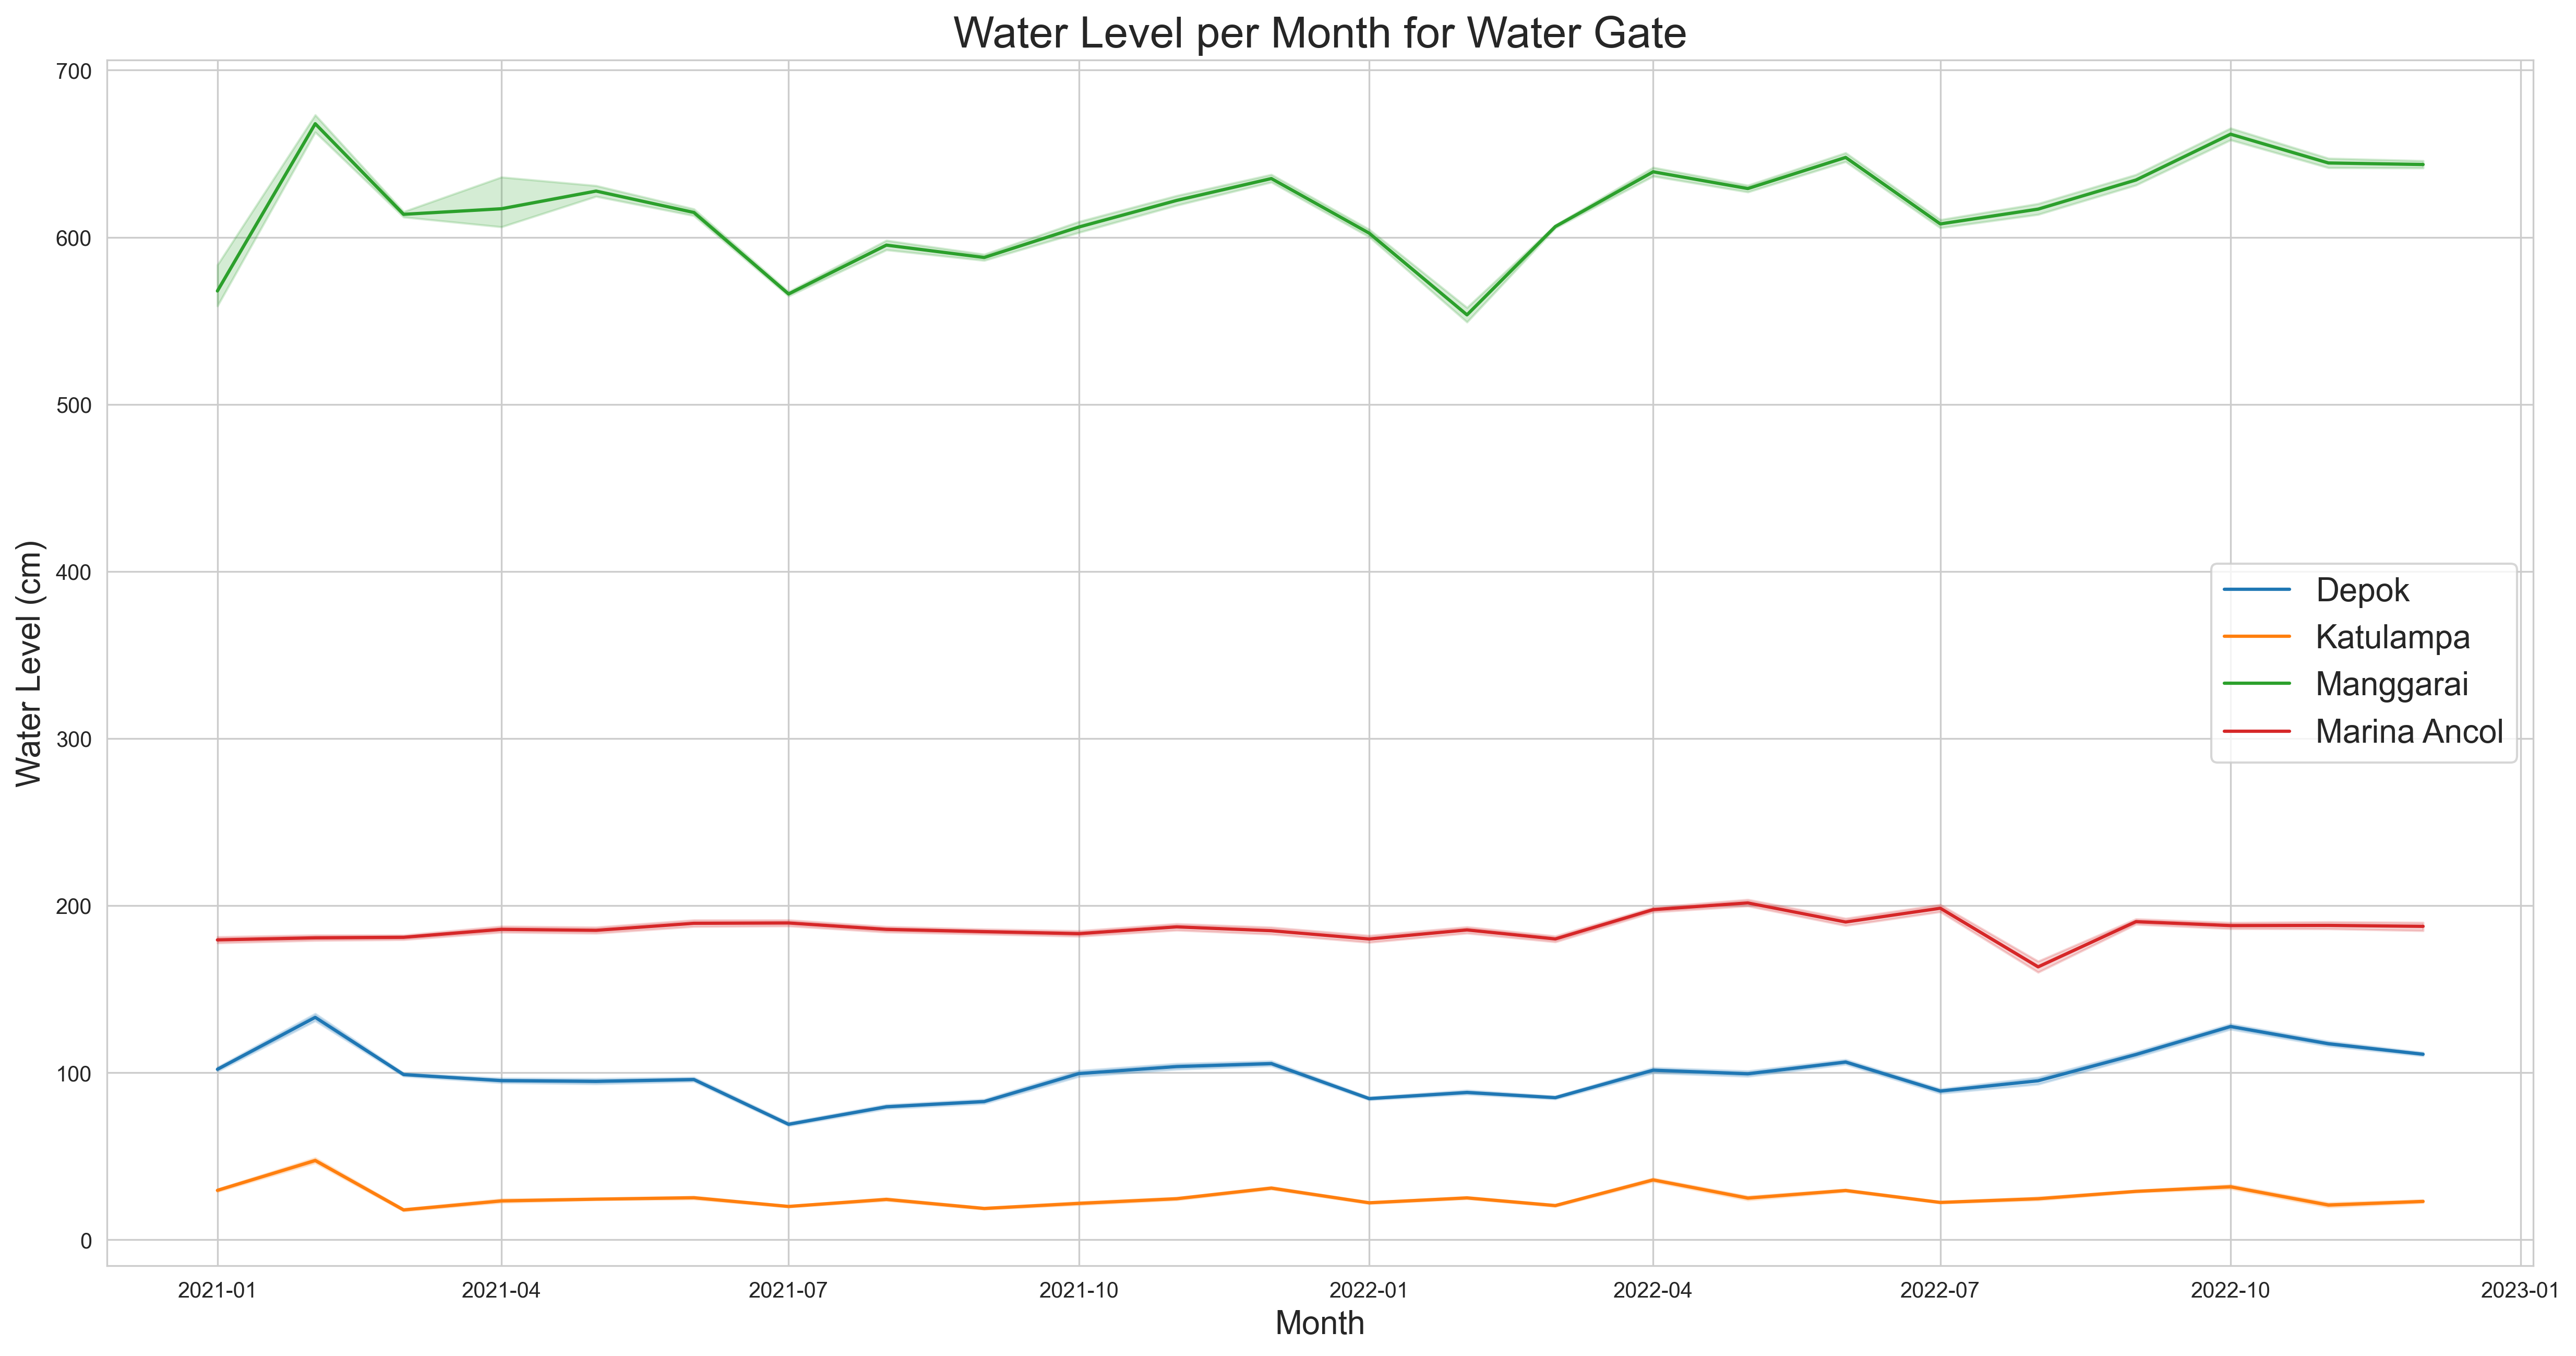

In [155]:
# Create a line graph of the Water Level data for Water Gate
plt.figure(figsize=(20,10), dpi=300)
sns.set_style("whitegrid")
sns.lineplot(x='Month', y='Tinggi Air', hue='Pintu Air', data=waterLevelPerMonth)
plt.title('Water Level per Month for Water Gate', fontsize=20)
plt.xlabel('Month', fontsize=15)
plt.ylabel('Water Level (cm)', fontsize=15)
plt.legend(fontsize=15, markerscale=2)
plt.show()

### Rainfall Per Month

In [156]:
# Make a copy of the rainfall data
rainfallPerMonth = data_rainfall.copy()

# Format the dates in the Month column to include both month and year
rainfallPerMonth['Month'] = data_rainfall['Waktu'].dt.strftime('%b %Y')

# convert the 'Month' column to datetime64
rainfallPerMonth['Month'] = pd.to_datetime(rainfallPerMonth['Month'])

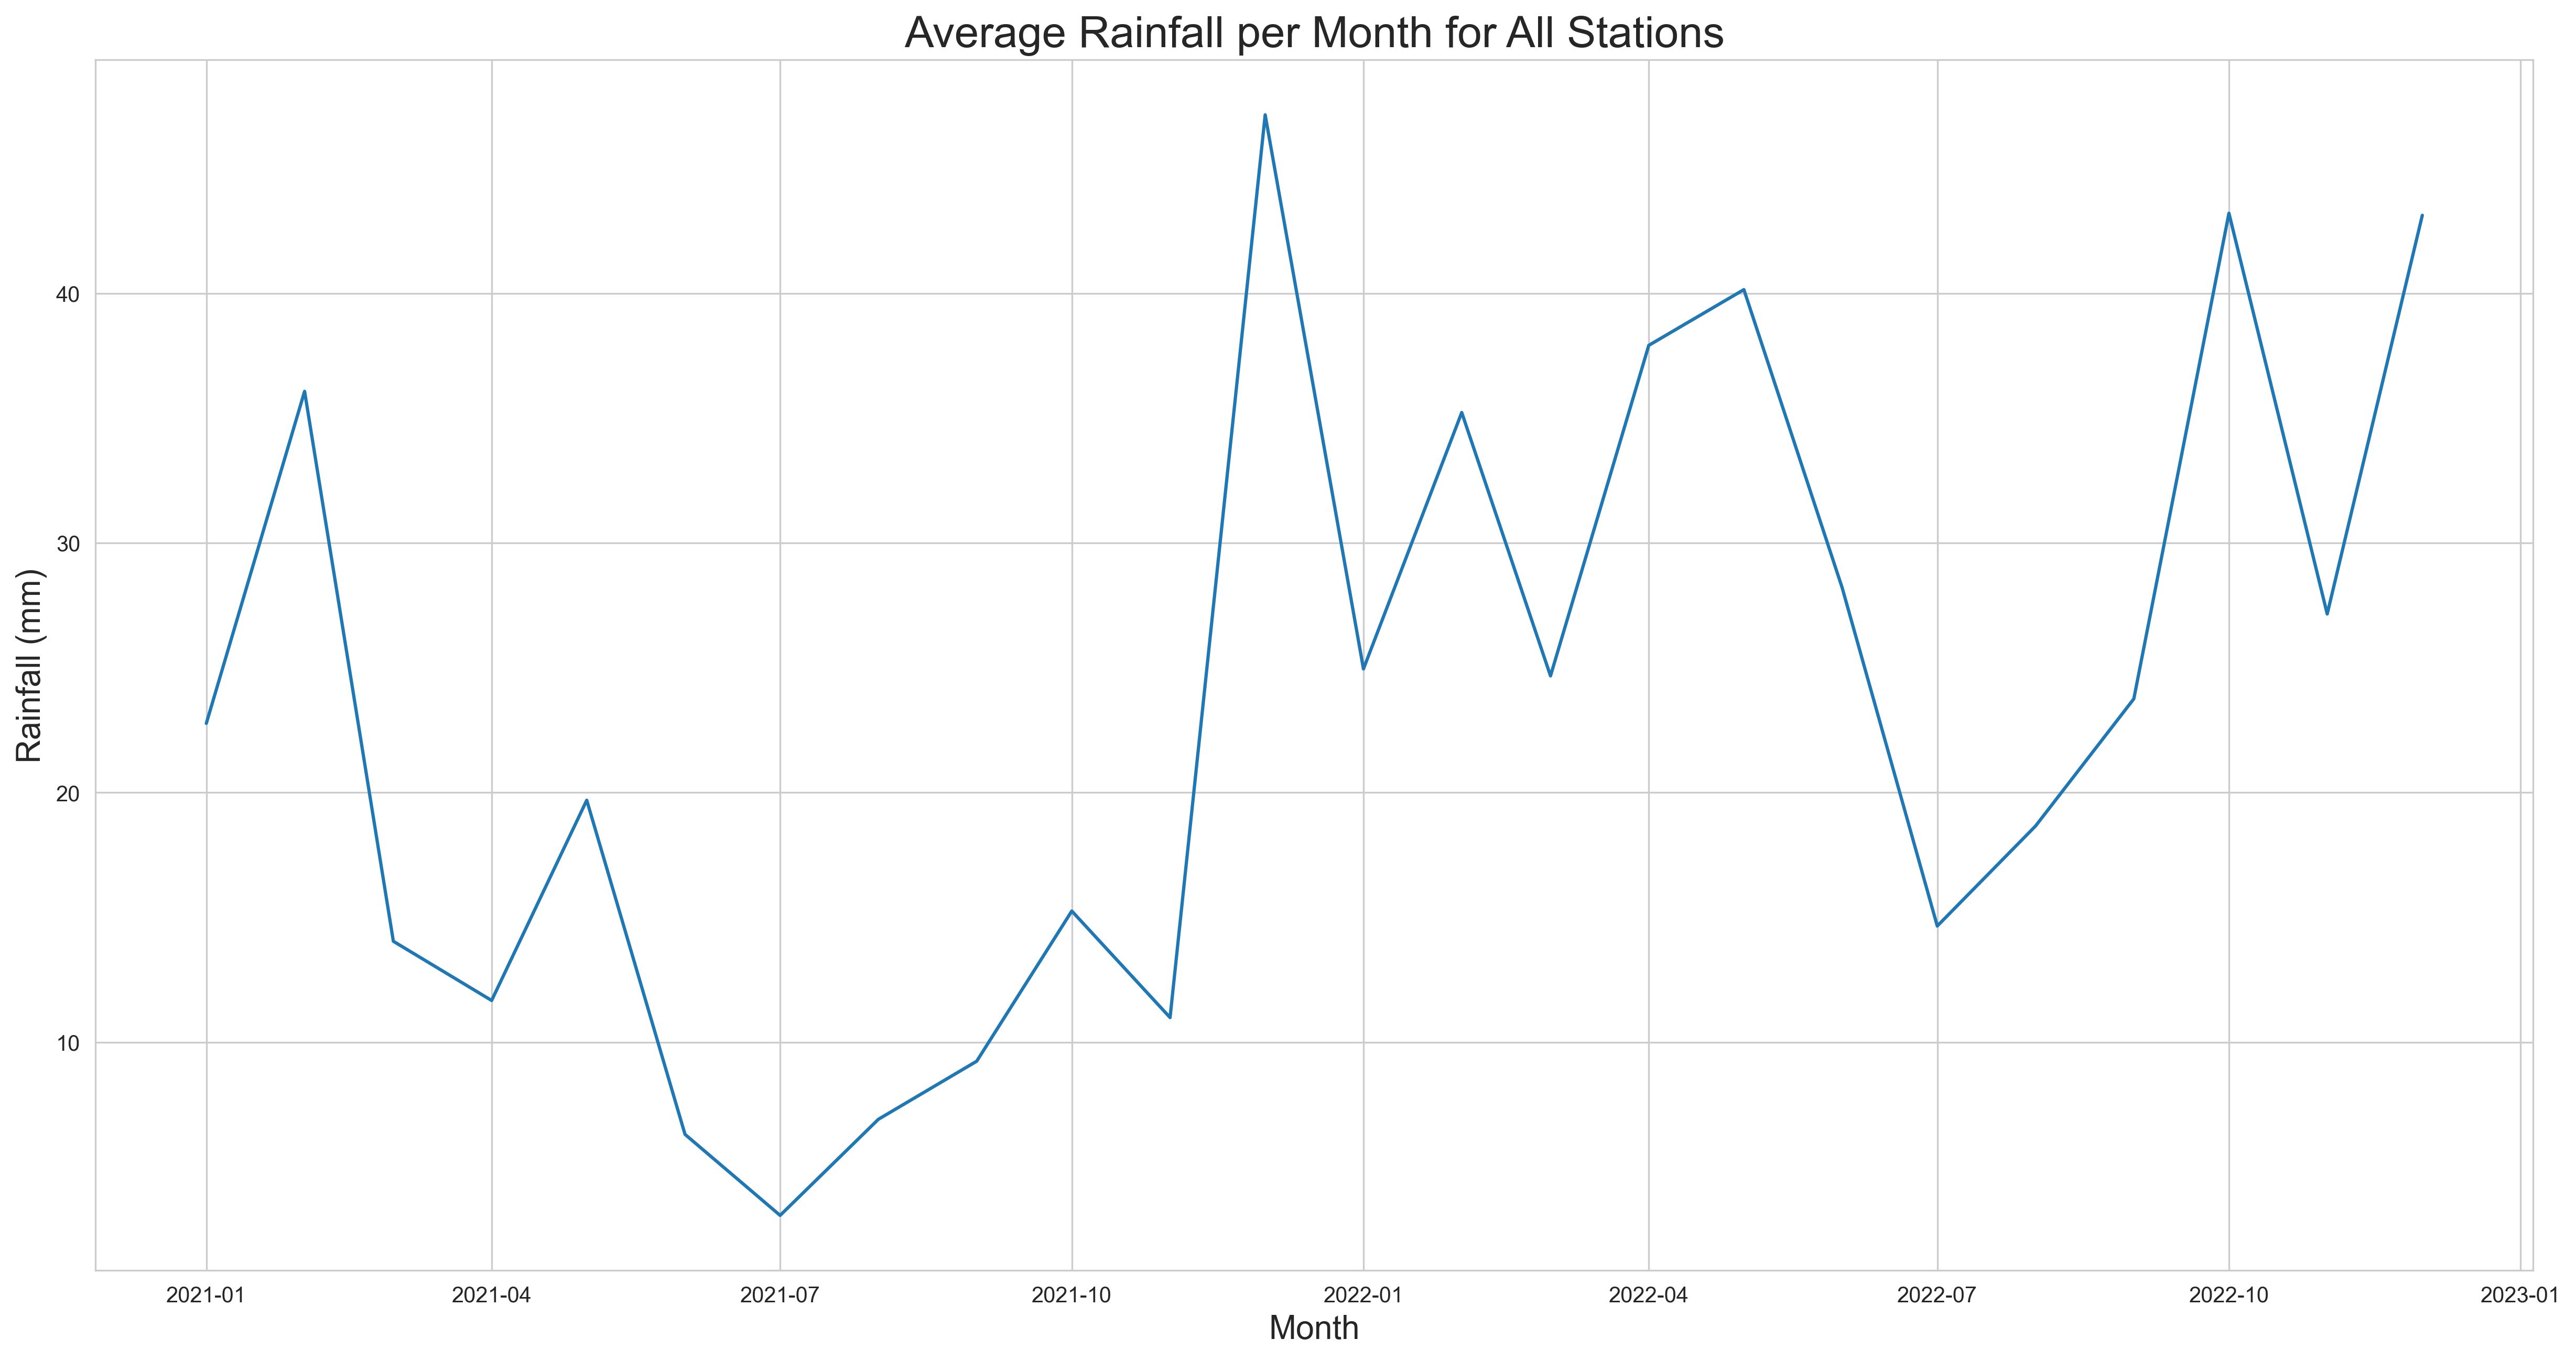

In [157]:
# Group the rainfall data by month and calculate the mean Intensitas for all stations
meanRainfallPerMonth = rainfallPerMonth.groupby('Month')['Intensitas'].mean().reset_index()

# Create a line graph of the mean rainfall data for all stations
plt.figure(figsize=(20,10), dpi=300)
sns.set_style("whitegrid")
sns.lineplot(x='Month', y='Intensitas', data=meanRainfallPerMonth)
plt.title('Average Rainfall per Month for All Stations', fontsize=20)
plt.xlabel('Month', fontsize=15)
plt.ylabel('Rainfall (mm)', fontsize=15)
plt.show()

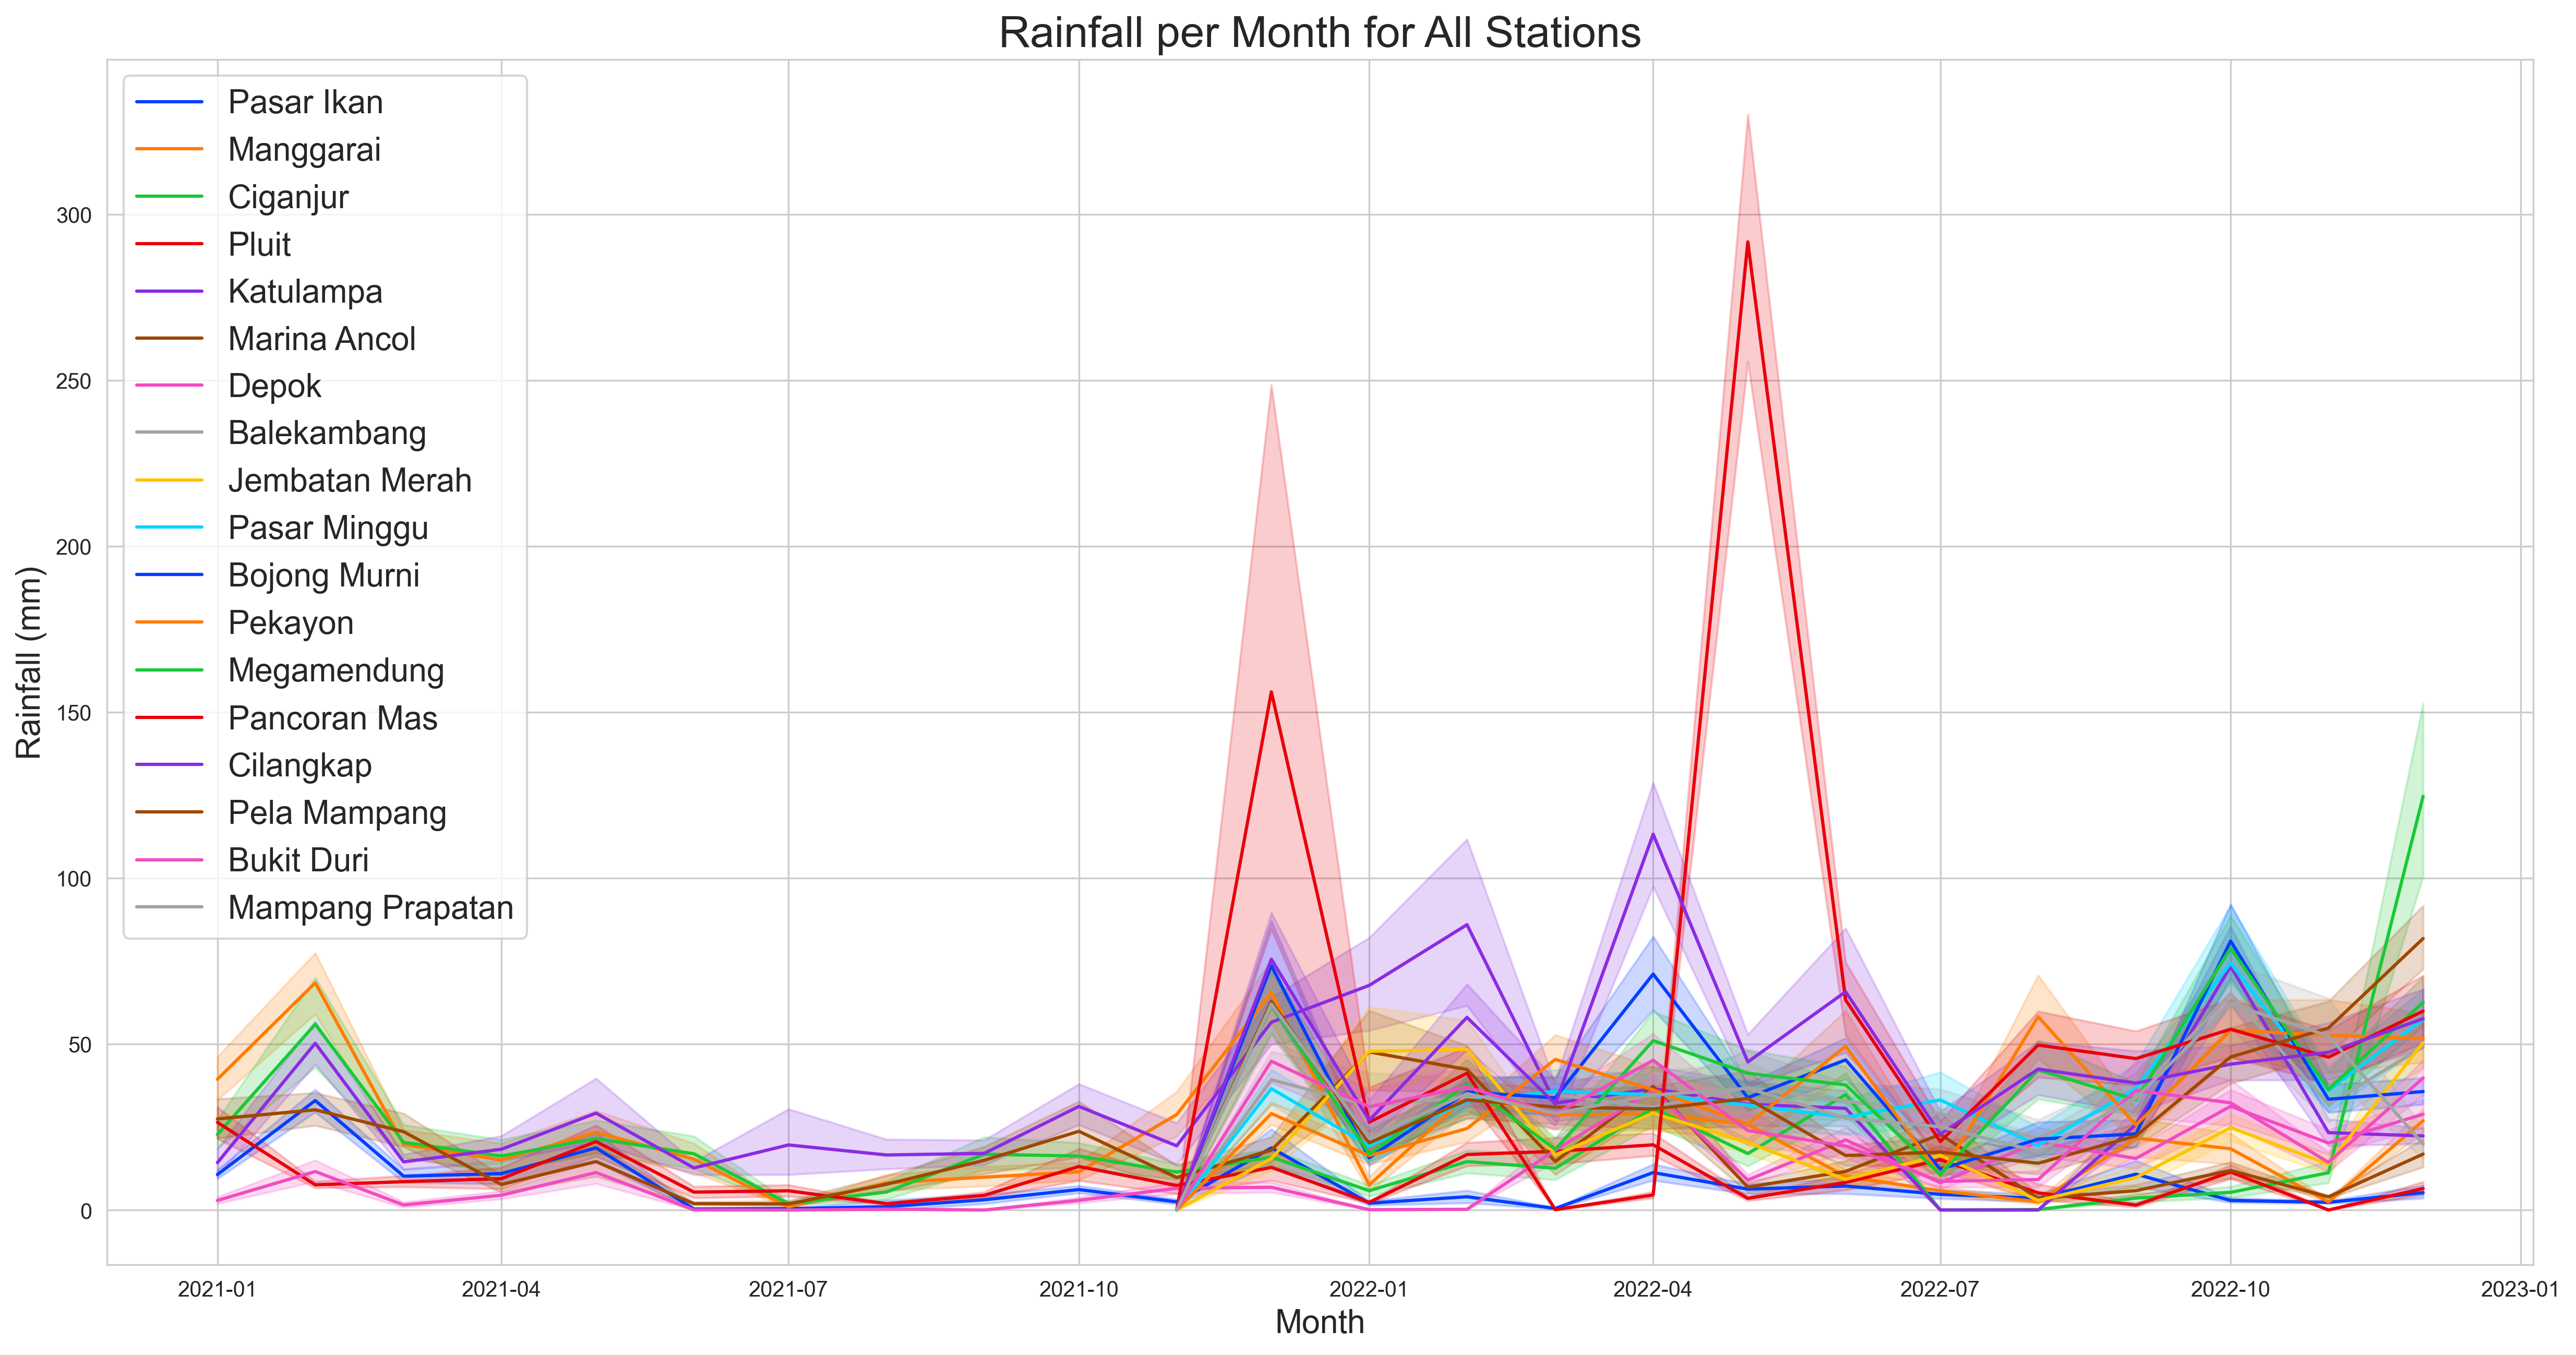

In [158]:
# Create a line graph of the rainfall data for all stations
plt.figure(figsize=(20,10), dpi=300)
sns.set_style("whitegrid")
sns.lineplot(x='Month', y='Intensitas', hue='Pos Pantau', data=rainfallPerMonth, palette='bright')
plt.title('Rainfall per Month for All Stations', fontsize=20)
plt.xlabel('Month', fontsize=15)
plt.ylabel('Rainfall (mm)', fontsize=15)
plt.legend(fontsize=15, markerscale=2)
plt.show()

### Waterlevel Per Hour

In [159]:
# Make a copy of the waterlevel data by Hour
waterLevelPerHour = data_waterlevel.copy()

# Format the dates in the Hour column to only Hour
waterLevelPerHour['Hour'] = data_waterlevel['Waktu'].dt.strftime('%H')

# Group the waterlevel data by Hour and calculate the mean Tinggi Air for all stations
meanWaterLevelPerHour = waterLevelPerHour.groupby('Hour')['Tinggi Air'].mean().reset_index()

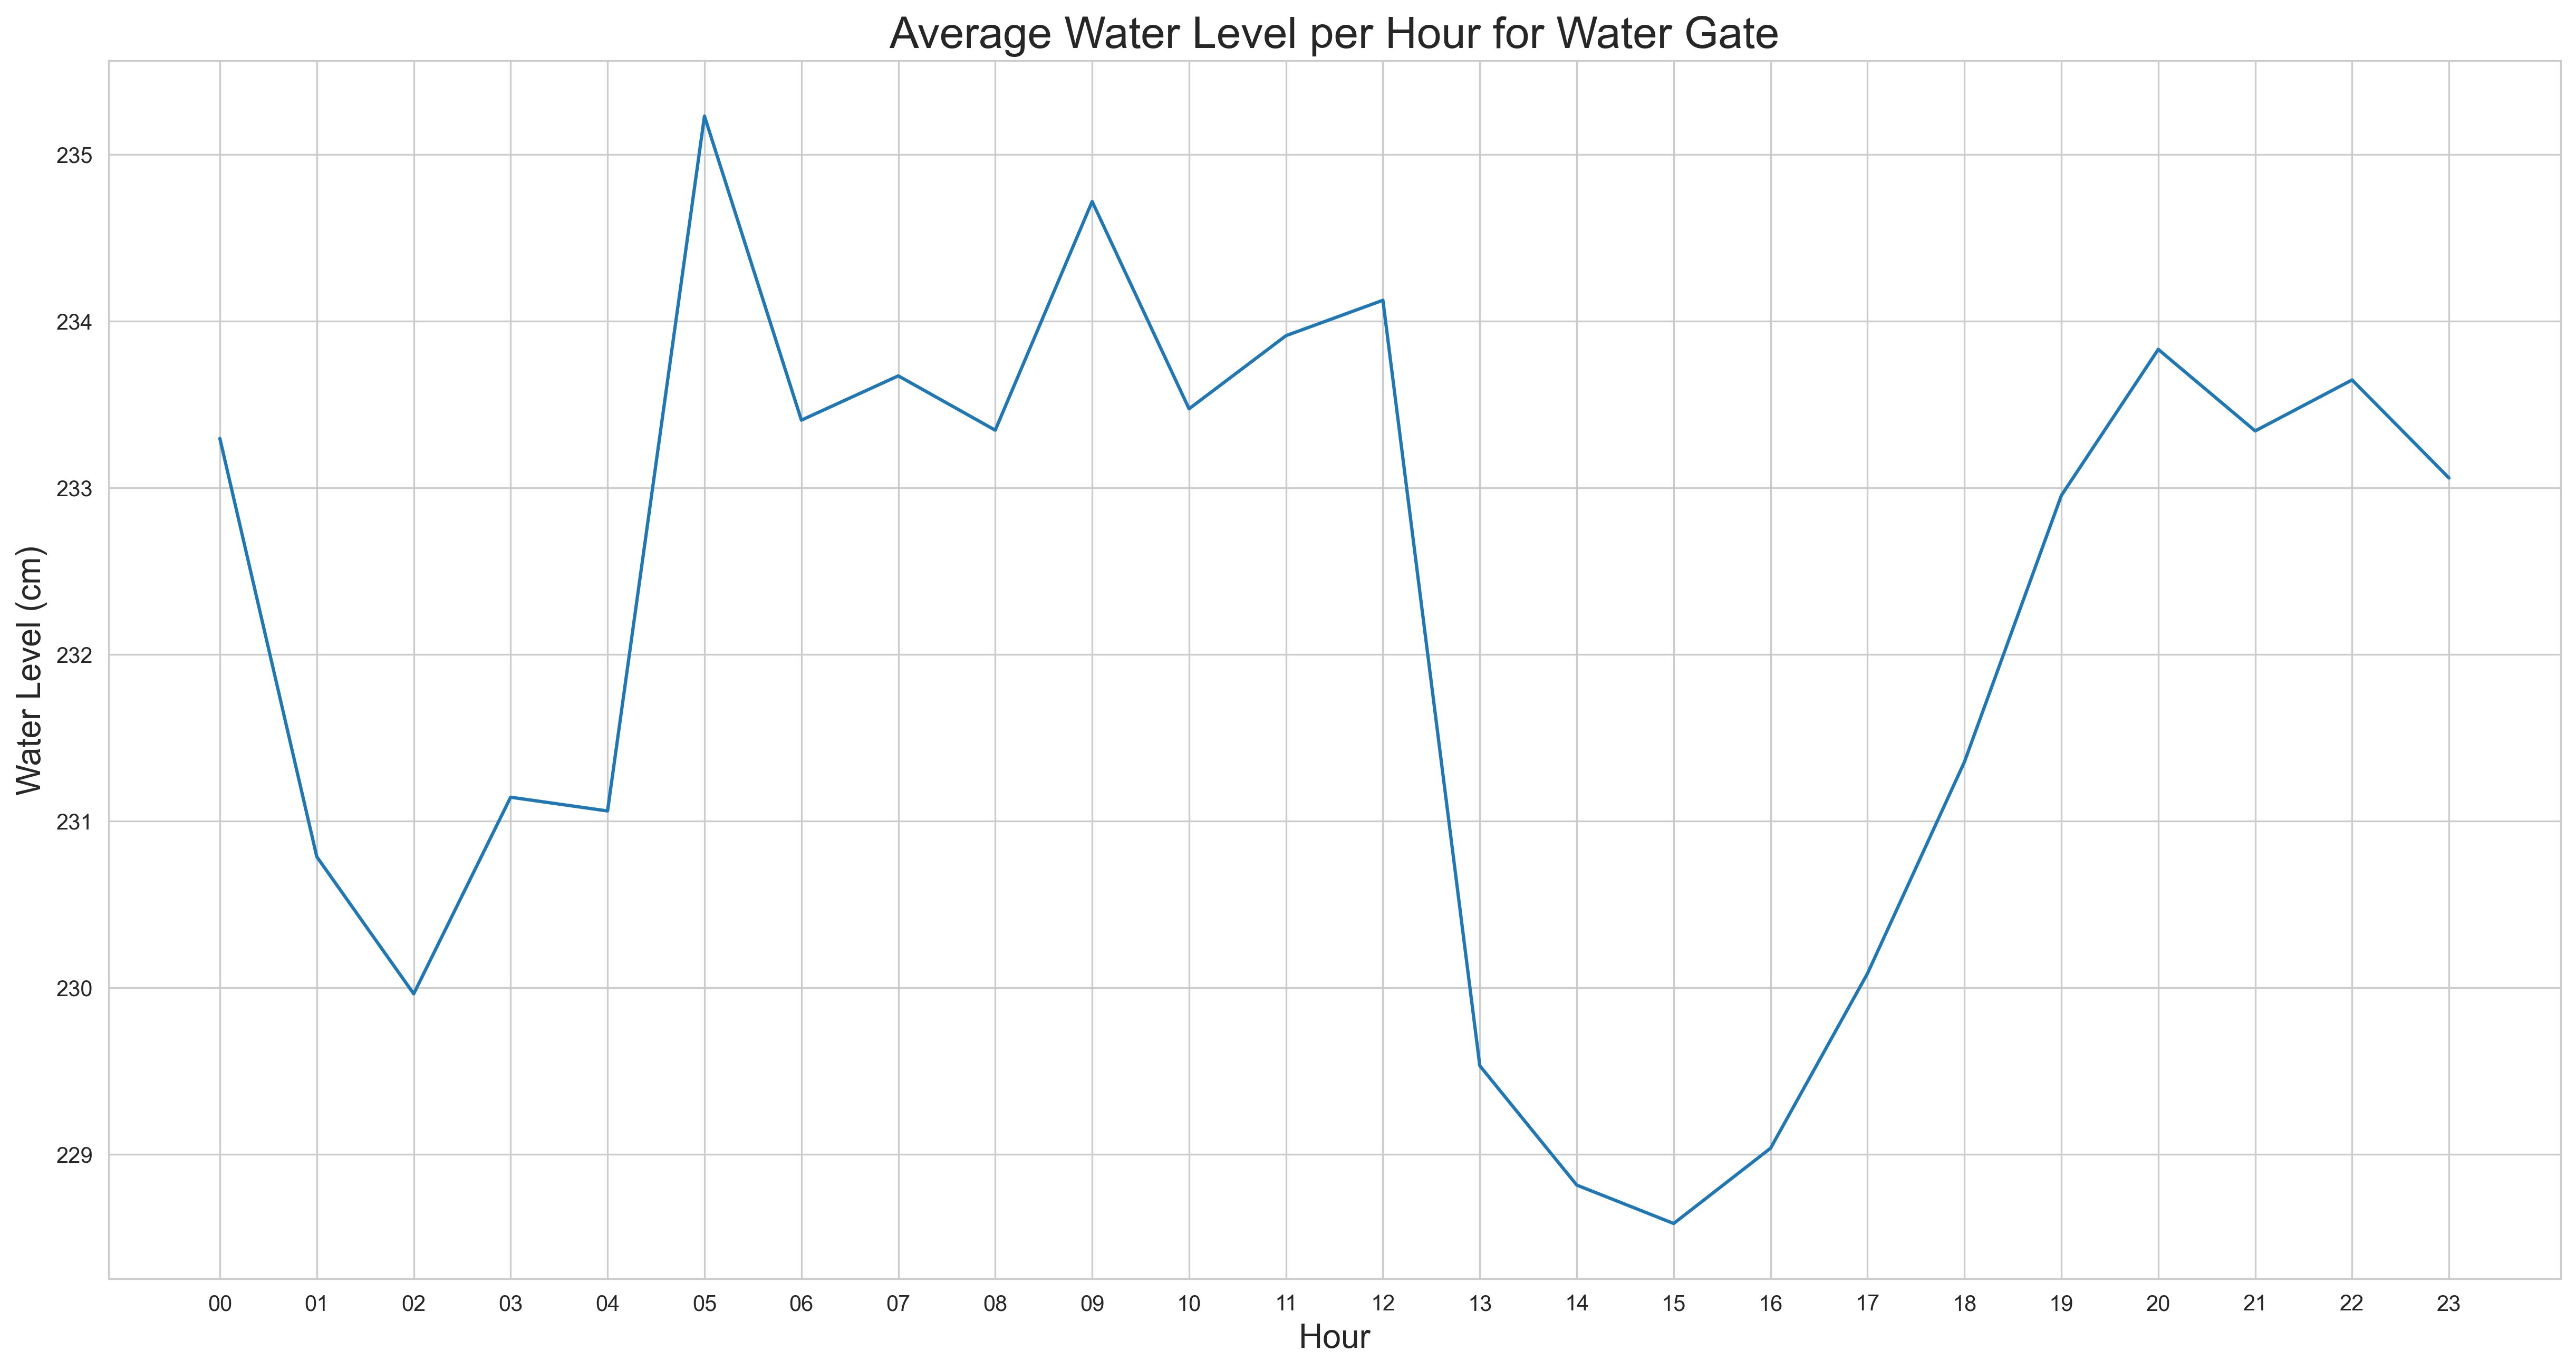

In [160]:
# Create a line graph of the mean waterlevel data for all stations
plt.figure(figsize=(20,10), dpi=300)
sns.set_style("whitegrid")
sns.lineplot(x='Hour', y='Tinggi Air', data=meanWaterLevelPerHour)
plt.title('Average Water Level per Hour for Water Gate', fontsize=20)
plt.xlabel('Hour', fontsize=15)
plt.ylabel('Water Level (cm)', fontsize=15)
plt.show()

### Rainfall Per Hour

In [161]:
# Make a copy of the rainfall data by Hour
rainfallPerHour = data_rainfall.copy()

# Format the dates in the Hour column to only Hour
rainfallPerHour['Hour'] = data_rainfall['Waktu'].dt.strftime('%H')

# Group the rainfall data by Hour and calculate the mean Intensitas for all stations
meanrainfallPerHour = rainfallPerHour.groupby('Hour')['Intensitas'].mean().reset_index()

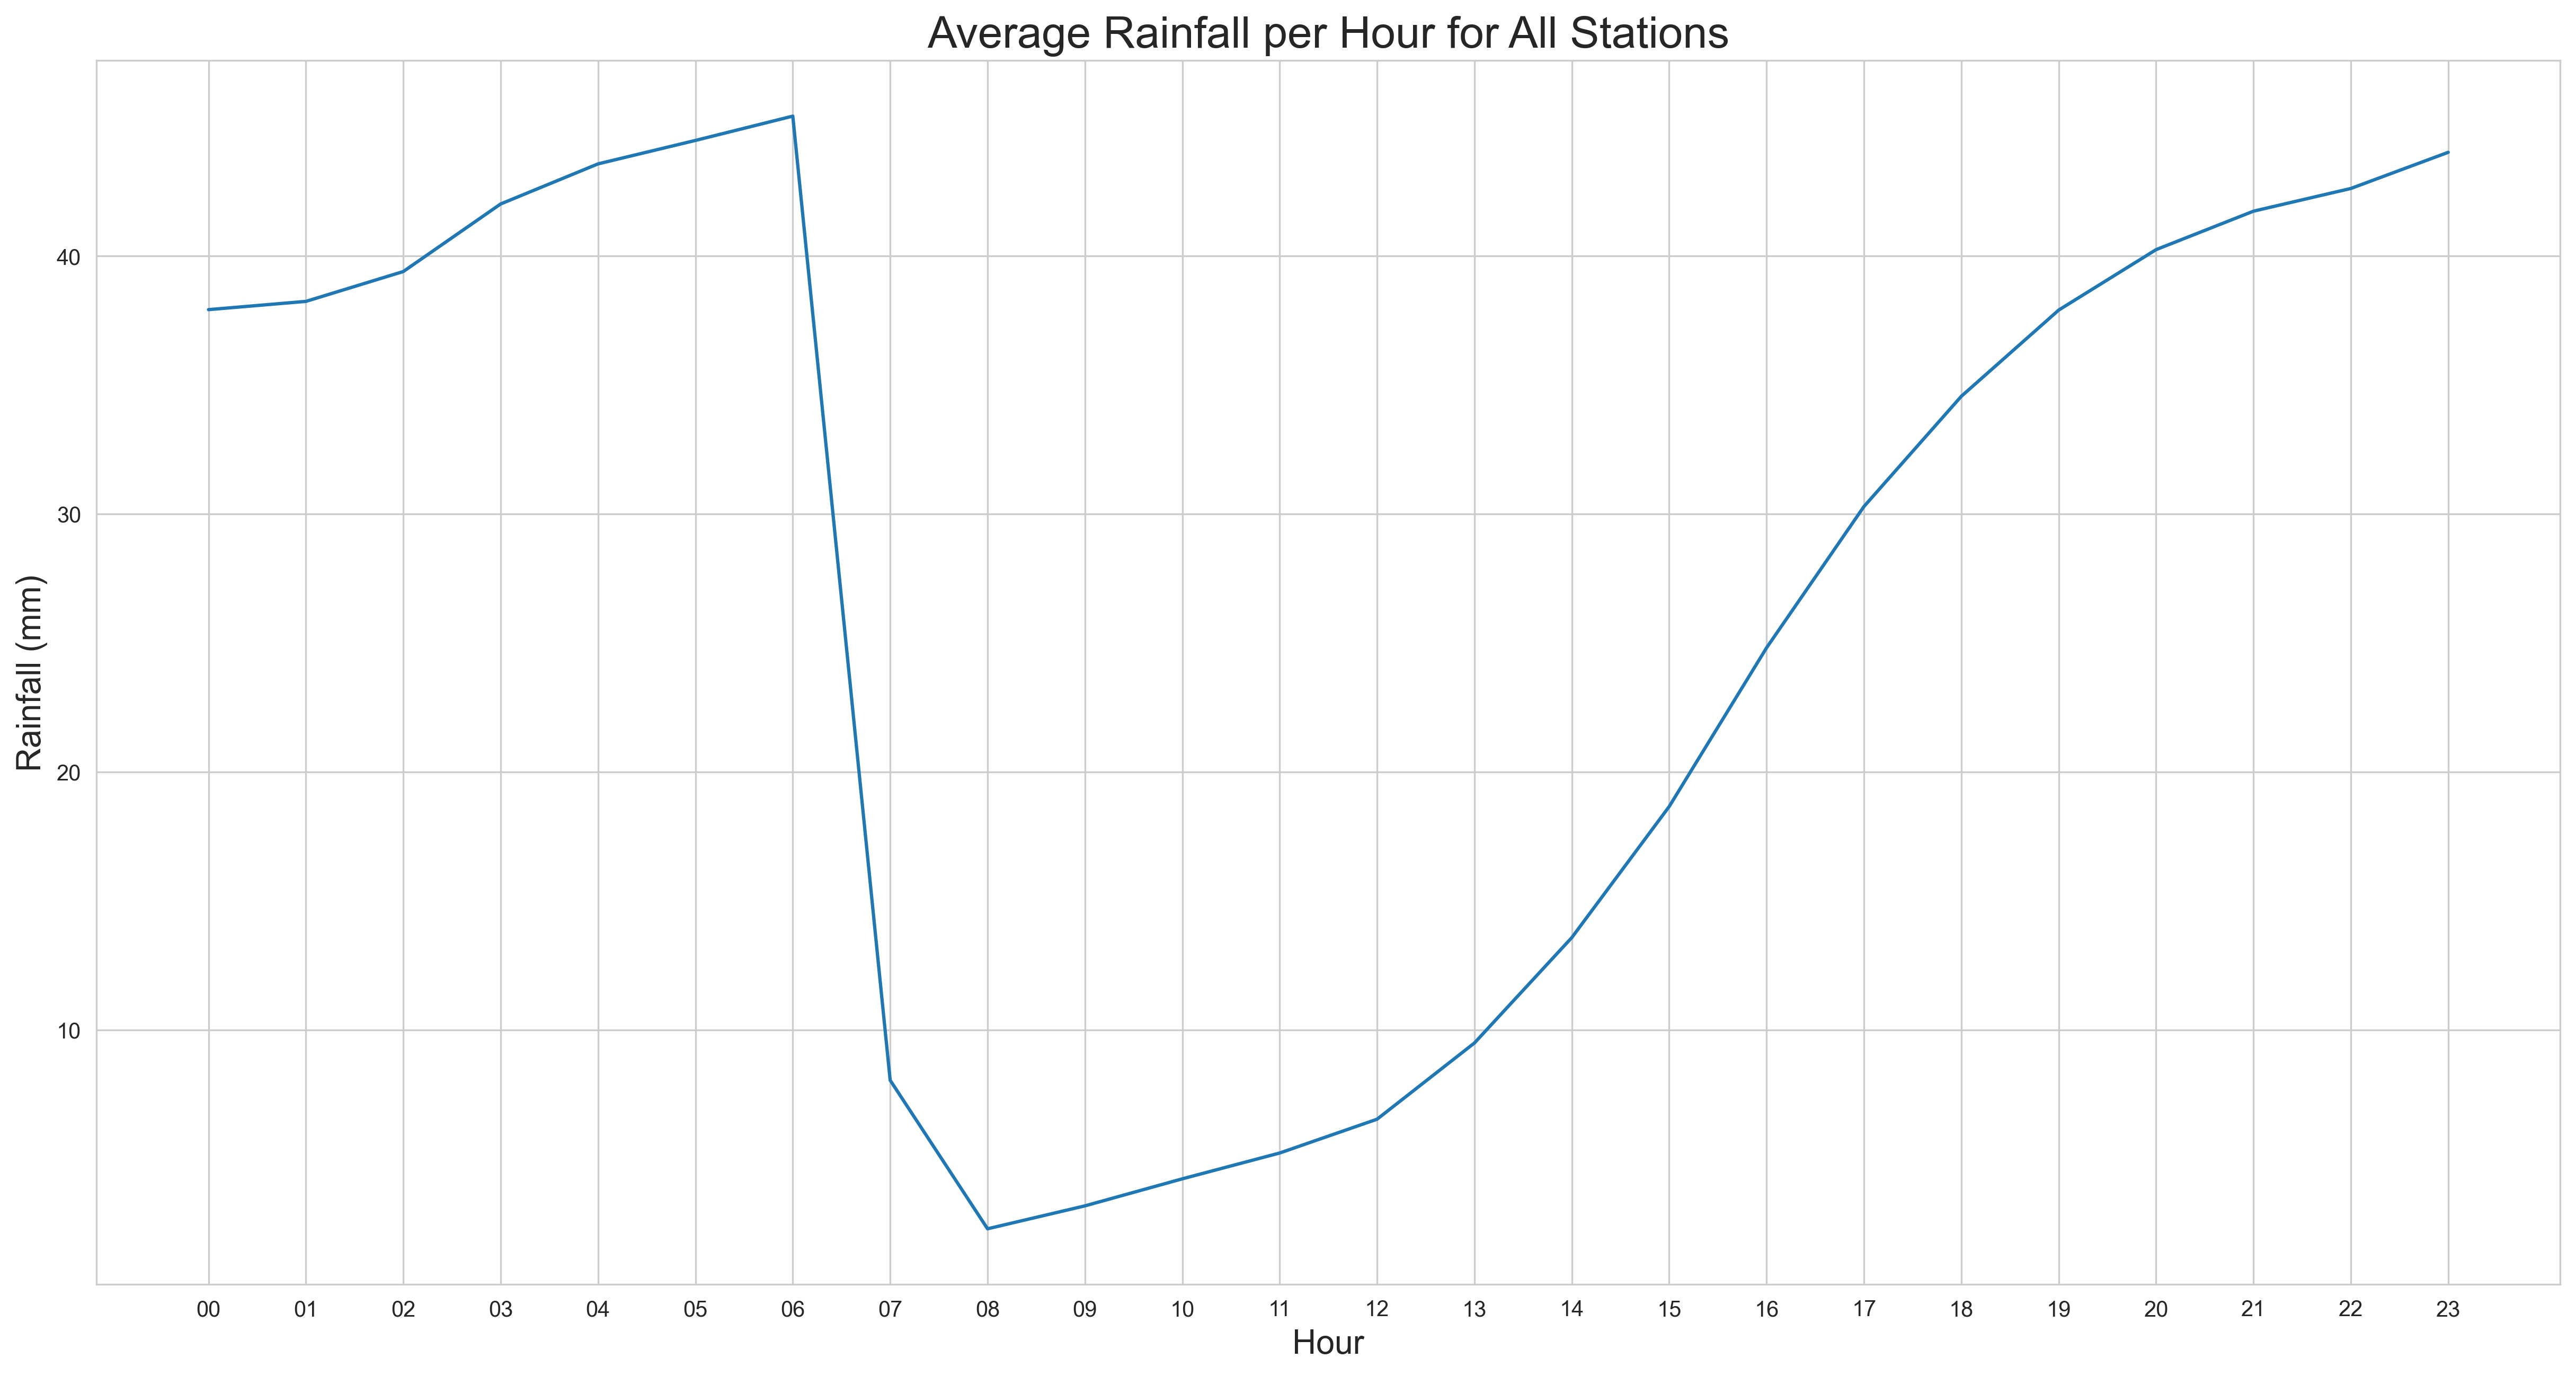

In [162]:
# Create a line graph of the mean waterlevel data for all stations
plt.figure(figsize=(20,10), dpi=300)
sns.set_style("whitegrid")
sns.lineplot(x='Hour', y='Intensitas', data=meanrainfallPerHour)
plt.title('Average Rainfall per Hour for All Stations', fontsize=20)
plt.xlabel('Hour', fontsize=15)
plt.ylabel('Rainfall (mm)', fontsize=15)
plt.show()

### Correlation Between Rainfall and Water Level in Every Station and Water Gate

To create a heatmap showing the correlation between rainfall and water level in each station and water gate, we need to reshape the data so that each value in `Pos Pantau` and `Pintu Air` becomes a column.

In [163]:
# Reshape the data_waterlevel DataFrame using pivot()
waterlevel_pivot = data_waterlevel.pivot(index='Waktu', columns='Pintu Air', values='Tinggi Air')

# Change the column names using a for loop
new_column_names = []
for old_name in waterlevel_pivot.columns:
    new_name = 'Pintu Air_' + old_name
    new_column_names.append(new_name)
waterlevel_pivot.columns = new_column_names

waterlevel_pivot.head()

Pintu Air_Depok  Pintu Air_Katulampa  \
Waktu                                                       
2021-01-01 01:00:00             82.0                 27.0   
2021-01-01 02:00:00             82.0                 26.0   
2021-01-01 03:00:00             85.0                 26.0   
2021-01-01 04:00:00             83.0                 10.0   
2021-01-01 05:00:00             83.0                 28.0   

                     Pintu Air_Manggarai  Pintu Air_Marina Ancol  
Waktu                                                             
2021-01-01 01:00:00                530.0                   165.0  
2021-01-01 02:00:00                526.0                   172.0  
2021-01-01 03:00:00                530.0                   177.0  
2021-01-01 04:00:00                523.0                   181.0  
2021-01-01 05:00:00                530.0                   188.0

In [164]:
print('NaN value in Waterlevel Pivot:', waterlevel_pivot.isnull().sum())

NaN value in Waterlevel Pivot: Pintu Air_Depok           517
Pintu Air_Katulampa       687
Pintu Air_Manggarai       545
Pintu Air_Marina Ancol    325
dtype: int64


In [165]:
# Fill missing values with the previous value using ffill method
waterlevel_pivot = waterlevel_pivot.fillna(method='ffill')
waterlevel_pivot.head()

Pintu Air_Depok  Pintu Air_Katulampa  \
Waktu                                                       
2021-01-01 01:00:00             82.0                 27.0   
2021-01-01 02:00:00             82.0                 26.0   
2021-01-01 03:00:00             85.0                 26.0   
2021-01-01 04:00:00             83.0                 10.0   
2021-01-01 05:00:00             83.0                 28.0   

                     Pintu Air_Manggarai  Pintu Air_Marina Ancol  
Waktu                                                             
2021-01-01 01:00:00                530.0                   165.0  
2021-01-01 02:00:00                526.0                   172.0  
2021-01-01 03:00:00                530.0                   177.0  
2021-01-01 04:00:00                523.0                   181.0  
2021-01-01 05:00:00                530.0                   188.0

In [166]:
# Reshape the data_rainfall DataFrame using pivot()
rainfall_pivot = data_rainfall.pivot(index='Waktu', columns='Pos Pantau', values='Intensitas')

# Change the column names using a for loop
new_column_names = []
for old_name in rainfall_pivot.columns:
    new_name = 'Pos Pantau_' + old_name
    new_column_names.append(new_name)
rainfall_pivot.columns = new_column_names

rainfall_pivot.head()

Pos Pantau_Balekambang  Pos Pantau_Bojong Murni  \
Waktu                                                                  
2021-01-01 07:00:00                     NaN                      NaN   
2021-01-01 08:00:00                     NaN                      NaN   
2021-01-01 09:00:00                     NaN                      NaN   
2021-01-01 10:00:00                     NaN                      NaN   
2021-01-01 11:00:00                     NaN                      NaN   

                     Pos Pantau_Bukit Duri  Pos Pantau_Ciganjur  \
Waktu                                                             
2021-01-01 07:00:00                    NaN                  0.0   
2021-01-01 08:00:00                    NaN                  0.0   
2021-01-01 09:00:00                    NaN                  0.0   
2021-01-01 10:00:00                    NaN                  2.0   
2021-01-01 11:00:00                    NaN                  5.0   

                     Pos Pantau_Cilangkap  Pos Pantau_Depok  \
Waktu                                                         
2021-01-01 07:00:00                   NaN               NaN   
2021-01-01 08:00:00                   NaN               NaN   
2021-01-01 09:00:00                   NaN               NaN   
2021-01-01 10:00:00                   NaN               NaN   
2021-01-01 11:00:00                   NaN               NaN   

                     Pos Pantau_Jembatan Merah  Pos Pantau_Katulampa  \
Waktu                                                                  
2021-01-01 07:00:00                        NaN                   0.0   
2021-01-01 08:00:00                        NaN                   0.0   
2021-01-01 09:00:00                        NaN                   0.0   
2021-01-01 10:00:00                        NaN                   0.0   
2021-01-01 11:00:00                        NaN                  12.0   

                     Pos Pantau_Mampang Prapatan  Pos Pantau_Manggarai  \
Waktu                                                                    
2021-01-01 07:00:00                          NaN                   0.0   
2021-01-01 08:00:00                          NaN                   0.0   
2021-01-01 09:00:00                          NaN                   0.0   
2021-01-01 10:00:00                          NaN                   0.0   
2021-01-01 11:00:00                          NaN                   0.0   

                     Pos Pantau_Marina Ancol  Pos Pantau_Megamendung  \
Waktu                                                                  
2021-01-01 07:00:00                      6.0                     NaN   
2021-01-01 08:00:00                      6.0                     NaN   
2021-01-01 09:00:00                      6.0                     NaN   
2021-01-01 10:00:00                      6.0                     NaN   
2021-01-01 11:00:00                      6.0                     NaN   

                     Pos Pantau_Pancoran Mas  Pos Pantau_Pasar Ikan  \
Waktu                                                                 
2021-01-01 07:00:00                      NaN                   36.0   
2021-01-01 08:00:00                      NaN                   39.0   
2021-01-01 09:00:00                      NaN                   44.0   
2021-01-01 10:00:00                      NaN                   40.0   
2021-01-01 11:00:00                      NaN                   52.0   

                     Pos Pantau_Pasar Minggu  Pos Pantau_Pekayon  \
Waktu                                                              
2021-01-01 07:00:00                      NaN                 NaN   
2021-01-01 08:00:00                      NaN                 NaN   
2021-01-01 09:00:00                      NaN                 NaN   
2021-01-01 10:00:00                      NaN                 NaN   
2021-01-01 11:00:00                      NaN                 NaN   

                     Pos Pantau_Pela Mampang  Pos Pantau_Pluit  
Waktu                              

In [167]:
print('NaN value in Rainfall Pivot:', rainfall_pivot.isnull().sum())

NaN value in Rainfall Pivot: Pos Pantau_Balekambang         7836
Pos Pantau_Bojong Murni        7912
Pos Pantau_Bukit Duri          8042
Pos Pantau_Ciganjur            4126
Pos Pantau_Cilangkap           8300
Pos Pantau_Depok                749
Pos Pantau_Jembatan Merah      8033
Pos Pantau_Katulampa           2144
Pos Pantau_Mampang Prapatan    8030
Pos Pantau_Manggarai            325
Pos Pantau_Marina Ancol         468
Pos Pantau_Megamendung         8621
Pos Pantau_Pancoran Mas        8287
Pos Pantau_Pasar Ikan          2877
Pos Pantau_Pasar Minggu        8003
Pos Pantau_Pekayon             8103
Pos Pantau_Pela Mampang        8797
Pos Pantau_Pluit               1201
dtype: int64


In [168]:
# Fill the missing value, in the first row fill it with 0, and in the other rows fill it with the previous value
rainfall_pivot.iloc[0] = rainfall_pivot.iloc[0].fillna(0)
rainfall_pivot = rainfall_pivot.fillna(method='ffill')
rainfall_pivot.head() 

Pos Pantau_Balekambang  Pos Pantau_Bojong Murni  \
Waktu                                                                  
2021-01-01 07:00:00                     0.0                      0.0   
2021-01-01 08:00:00                     0.0                      0.0   
2021-01-01 09:00:00                     0.0                      0.0   
2021-01-01 10:00:00                     0.0                      0.0   
2021-01-01 11:00:00                     0.0                      0.0   

                     Pos Pantau_Bukit Duri  Pos Pantau_Ciganjur  \
Waktu                                                             
2021-01-01 07:00:00                    0.0                  0.0   
2021-01-01 08:00:00                    0.0                  0.0   
2021-01-01 09:00:00                    0.0                  0.0   
2021-01-01 10:00:00                    0.0                  2.0   
2021-01-01 11:00:00                    0.0                  5.0   

                     Pos Pantau_Cilangkap  Pos Pantau_Depok  \
Waktu                                                         
2021-01-01 07:00:00                   0.0               0.0   
2021-01-01 08:00:00                   0.0               0.0   
2021-01-01 09:00:00                   0.0               0.0   
2021-01-01 10:00:00                   0.0               0.0   
2021-01-01 11:00:00                   0.0               0.0   

                     Pos Pantau_Jembatan Merah  Pos Pantau_Katulampa  \
Waktu                                                                  
2021-01-01 07:00:00                        0.0                   0.0   
2021-01-01 08:00:00                        0.0                   0.0   
2021-01-01 09:00:00                        0.0                   0.0   
2021-01-01 10:00:00                        0.0                   0.0   
2021-01-01 11:00:00                        0.0                  12.0   

                     Pos Pantau_Mampang Prapatan  Pos Pantau_Manggarai  \
Waktu                                                                    
2021-01-01 07:00:00                          0.0                   0.0   
2021-01-01 08:00:00                          0.0                   0.0   
2021-01-01 09:00:00                          0.0                   0.0   
2021-01-01 10:00:00                          0.0                   0.0   
2021-01-01 11:00:00                          0.0                   0.0   

                     Pos Pantau_Marina Ancol  Pos Pantau_Megamendung  \
Waktu                                                                  
2021-01-01 07:00:00                      6.0                     0.0   
2021-01-01 08:00:00                      6.0                     0.0   
2021-01-01 09:00:00                      6.0                     0.0   
2021-01-01 10:00:00                      6.0                     0.0   
2021-01-01 11:00:00                      6.0                     0.0   

                     Pos Pantau_Pancoran Mas  Pos Pantau_Pasar Ikan  \
Waktu                                                                 
2021-01-01 07:00:00                      0.0                   36.0   
2021-01-01 08:00:00                      0.0                   39.0   
2021-01-01 09:00:00                      0.0                   44.0   
2021-01-01 10:00:00                      0.0                   40.0   
2021-01-01 11:00:00                      0.0                   52.0   

                     Pos Pantau_Pasar Minggu  Pos Pantau_Pekayon  \
Waktu                                                              
2021-01-01 07:00:00                      0.0                 0.0   
2021-01-01 08:00:00                      0.0                 0.0   
2021-01-01 09:00:00                      0.0                 0.0   
2021-01-01 10:00:00                      0.0                 0.0   
2021-01-01 11:00:00                      0.0                 0.0   

                     Pos Pantau_Pela Mampang  Pos Pantau_Pluit  
Waktu                              

In [169]:
# Combine the waterlevel_pivot and rainfall_pivot DataFrames
combined_pivot = pd.concat([rainfall_pivot, waterlevel_pivot], axis=1)

# Remove the rows with missing values because both rainfall and water level data doesnt have the same ammount of time
combined_pivot = combined_pivot.dropna()

# Sort the columns of the combined_pivot DataFrame alphabetically
combined_pivot = combined_pivot.sort_index(axis=1)

# Print the first five rows of the combined_pivot DataFrame
combined_pivot.head()

Pintu Air_Depok  Pintu Air_Katulampa  \
Waktu                                                       
2021-01-01 07:00:00             83.0                 28.0   
2021-01-01 08:00:00             83.0                 27.0   
2021-01-01 09:00:00             83.0                 26.0   
2021-01-01 10:00:00             83.0                 10.0   
2021-01-01 11:00:00             83.0                 23.0   

                     Pintu Air_Manggarai  Pintu Air_Marina Ancol  \
Waktu                                                              
2021-01-01 07:00:00                530.0                   192.0   
2021-01-01 08:00:00                530.0                   194.0   
2021-01-01 09:00:00                522.0                   236.0   
2021-01-01 10:00:00                521.0                   242.0   
2021-01-01 11:00:00                525.0                   241.0   

                     Pos Pantau_Balekambang  Pos Pantau_Bojong Murni  \
Waktu                                                                  
2021-01-01 07:00:00                     0.0                      0.0   
2021-01-01 08:00:00                     0.0                      0.0   
2021-01-01 09:00:00                     0.0                      0.0   
2021-01-01 10:00:00                     0.0                      0.0   
2021-01-01 11:00:00                     0.0                      0.0   

                     Pos Pantau_Bukit Duri  Pos Pantau_Ciganjur  \
Waktu                                                             
2021-01-01 07:00:00                    0.0                  0.0   
2021-01-01 08:00:00                    0.0                  0.0   
2021-01-01 09:00:00                    0.0                  0.0   
2021-01-01 10:00:00                    0.0                  2.0   
2021-01-01 11:00:00                    0.0                  5.0   

                     Pos Pantau_Cilangkap  Pos Pantau_Depok  \
Waktu                                                         
2021-01-01 07:00:00                   0.0               0.0   
2021-01-01 08:00:00                   0.0               0.0   
2021-01-01 09:00:00                   0.0               0.0   
2021-01-01 10:00:00                   0.0               0.0   
2021-01-01 11:00:00                   0.0               0.0   

                     Pos Pantau_Jembatan Merah  Pos Pantau_Katulampa  \
Waktu                                                                  
2021-01-01 07:00:00                        0.0                   0.0   
2021-01-01 08:00:00                        0.0                   0.0   
2021-01-01 09:00:00                        0.0                   0.0   
2021-01-01 10:00:00                        0.0                   0.0   
2021-01-01 11:00:00                        0.0                  12.0   

                     Pos Pantau_Mampang Prapatan  Pos Pantau_Manggarai  \
Waktu                                                                    
2021-01-01 07:00:00                          0.0                   0.0   
2021-01-01 08:00:00                          0.0                   0.0   
2021-01-01 09:00:00                          0.0                   0.0   
2021-01-01 10:00:00                          0.0                   0.0   
2021-01-01 11:00:00                          0.0                   0.0   

                     Pos Pantau_Marina Ancol  Pos Pantau_Megamendung  \
Waktu                                                                  
2021-01-01 07:00:00                      6.0                     0.0   
2021-01-01 08:00:00                      6.0                     0.0   
2021-01-01 09:00:00                      6.0                     0.0   
2021-01-01 10:00:00                      6.0                     0.0   
2021-01-01 11:00:00                      6.0                     0.0   

                     Pos Pantau_Pancoran Mas  Pos Pantau_Pasar Ikan  \
Waktu                                                                 
2021-01-01 07:00:00         

In [170]:
# Print the shape of combined_pivot
print("Combined Pivot Shape :", combined_pivot.shape)

Combined Pivot Shape : (17315, 22)


In [171]:
# Use MinMaxScaler to scale the data
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to the combined_pivot DataFrame
scaler.fit(combined_pivot)

# Transform and store the scaled data in a new variable
scaled_data = scaler.transform(combined_pivot)

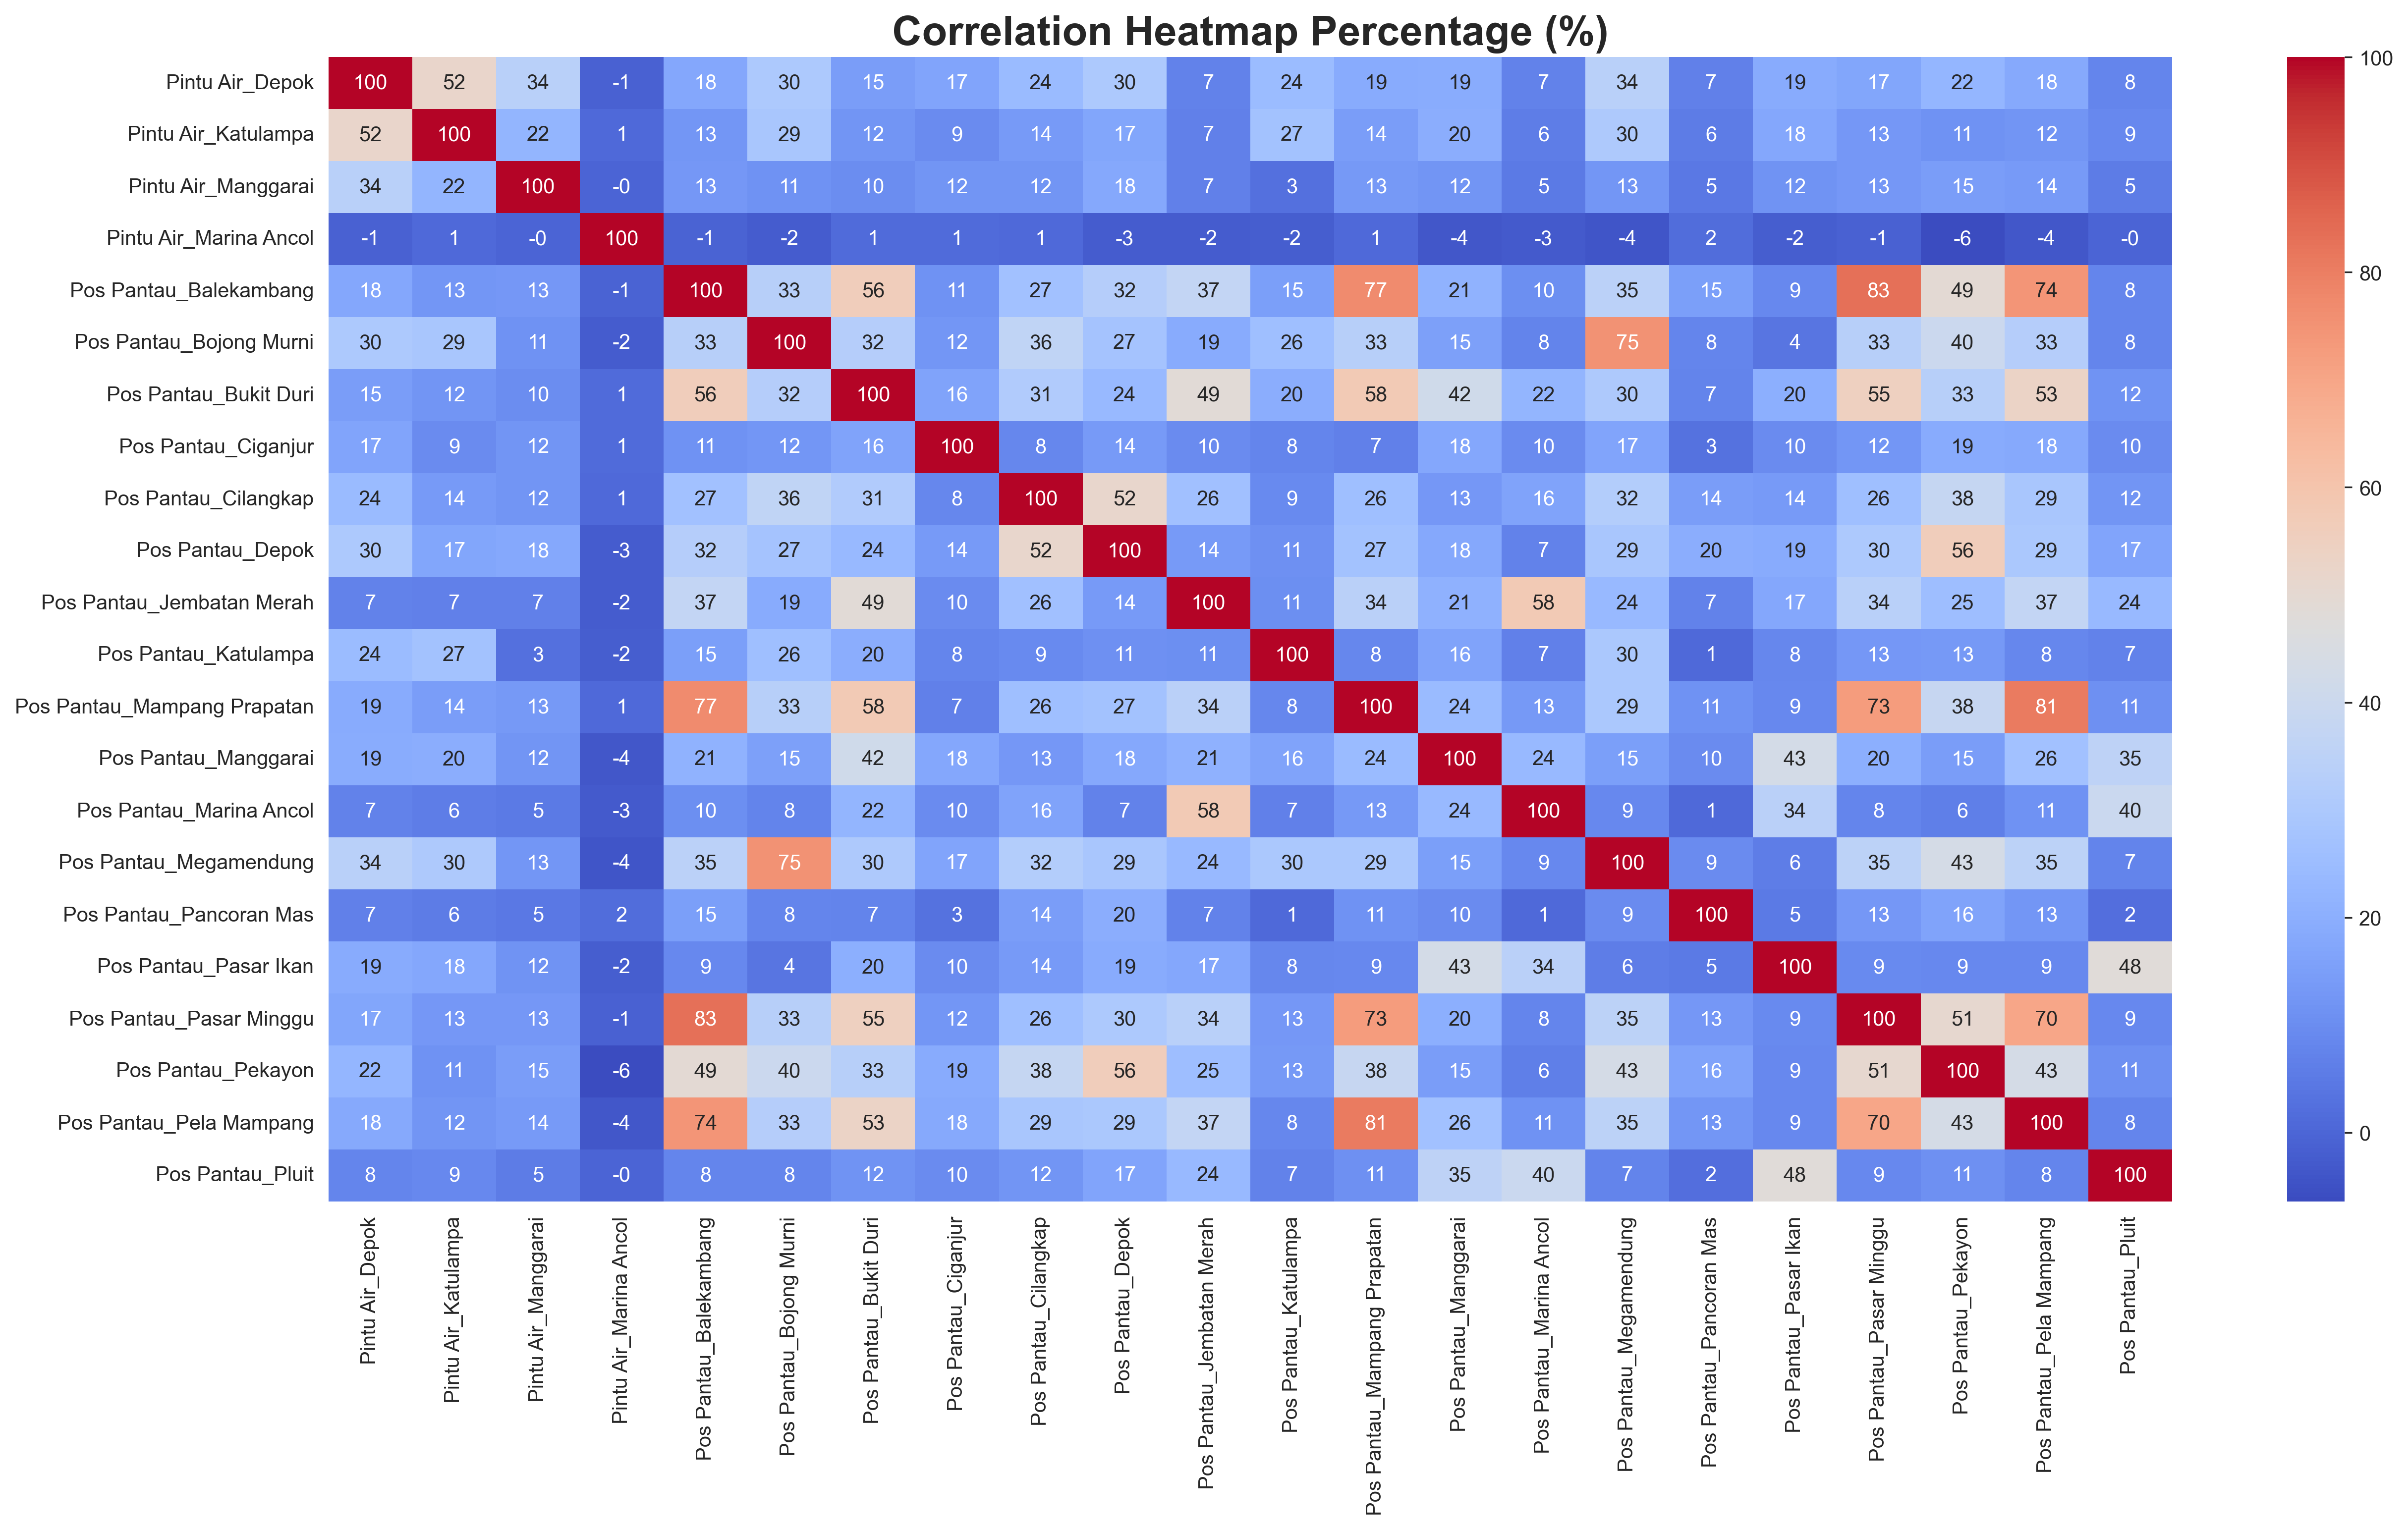

In [172]:
# Create the heatmap with correlation values in percentage
plt.figure(figsize=(20,10), dpi=300)
corr_heatmap = sns.heatmap(combined_pivot.corr() * 100, annot=True, cmap='coolwarm', fmt='.0f')
corr_heatmap.set_title('Correlation Heatmap Percentage (%)', fontsize=20, fontweight='bold')
plt.show()

### Water Level Distribution 

First, we eliminate outliers to enhance data visualization. Then, we create a histogram, excluding rainfall due to its predominantly skewed distribution with a significant number of instances at 0 mm.

In [173]:
# Find the waterlevel_outliers in the 'Tinggi Air' column in data_waterlevel

# Calculate the first and third quartiles using the describe() method
first_quartile = data_waterlevel['Tinggi Air'].describe()['25%']
third_quartile = data_waterlevel['Tinggi Air'].describe()['75%']

# Calculate the interquartile range (IQR)
iqr = third_quartile - first_quartile

# Calculate the upper and lower limits for waterlevel_outliers using the IQR
upper_limit = third_quartile + (1.5 * iqr)
lower_limit = first_quartile - (1.5 * iqr)

# drop the outliers from the 'Tinggi Air' column
waterlevel_outliers = data_waterlevel[(data_waterlevel['Tinggi Air'] < upper_limit) & (data_waterlevel['Tinggi Air'] > lower_limit)]

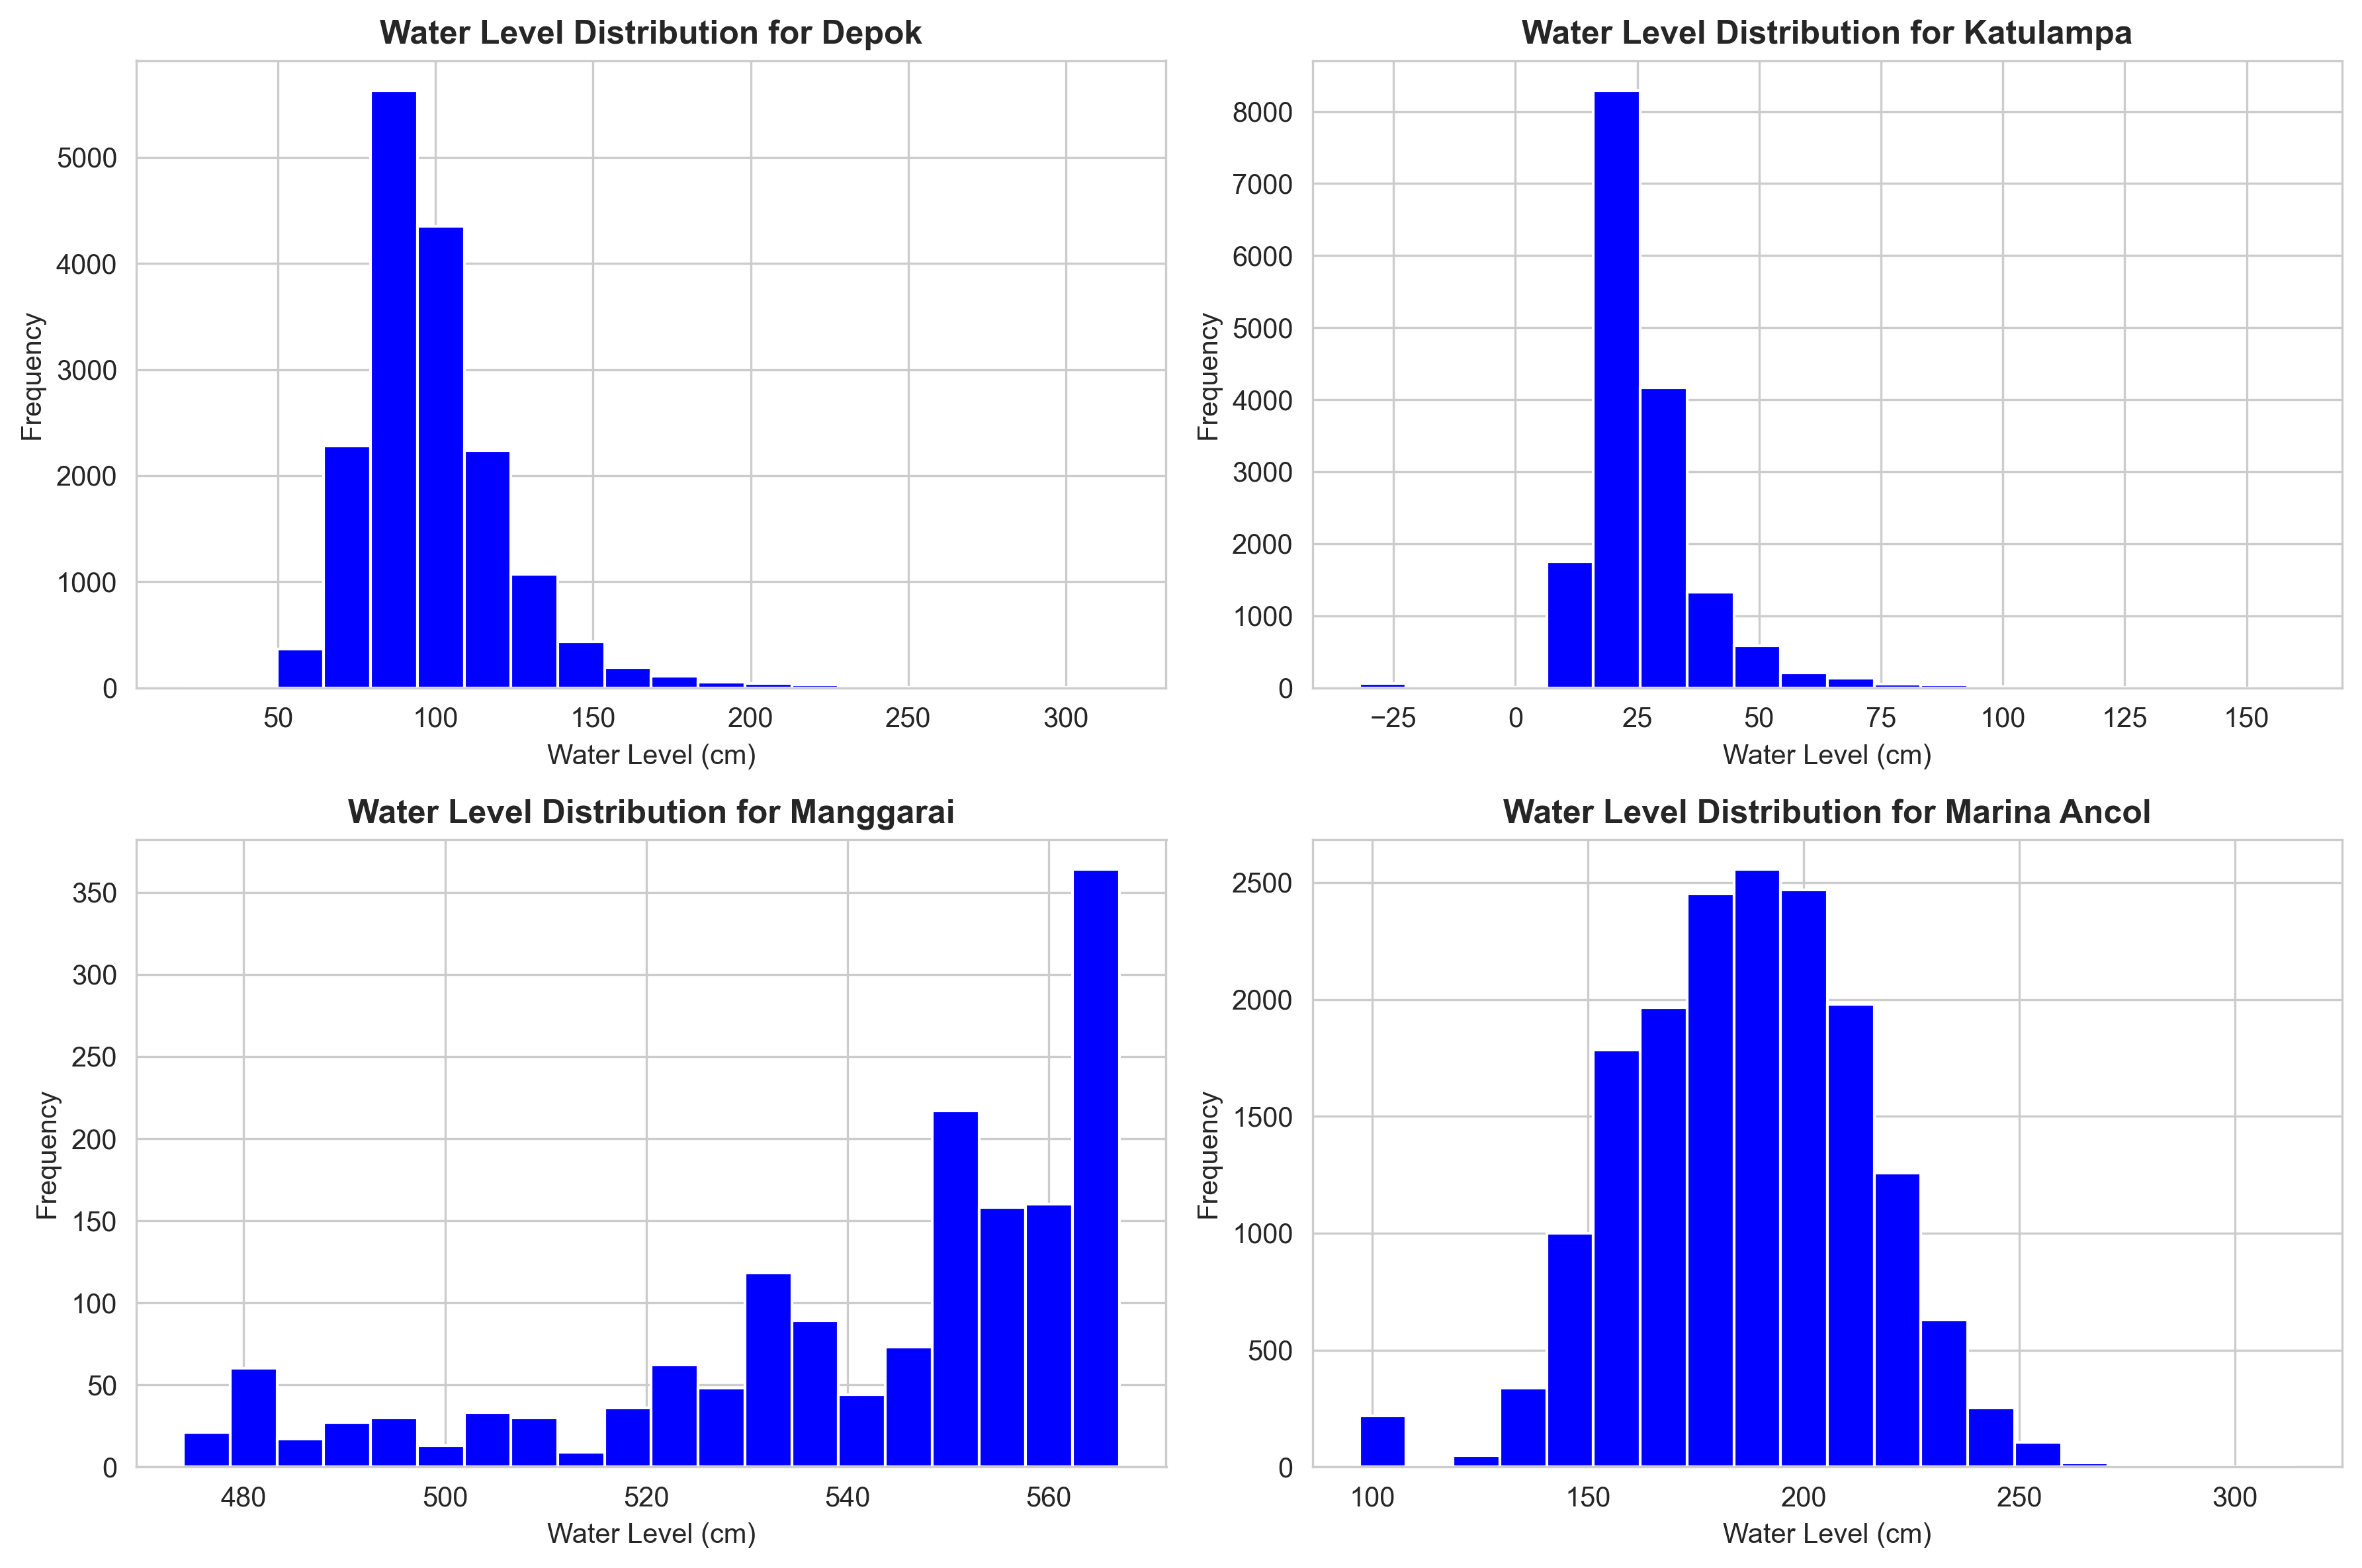

In [174]:
# Get the unique values in the 'Pintu Air' column
pintu_air_values = waterlevel_outliers['Pintu Air'].unique()

# Create a 2x2 grid of histograms for each unique value in the 'Pintu Air' column
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8), dpi=300)

# Flatten the axs array to make it easier to iterate over
axs = axs.flatten()

# Loop through each unique value in the 'Pintu Air' column
for i, pintu_air in enumerate(pintu_air_values):
    # Filter the DataFrame to only include rows with the current pintu_air value
    filtered_df = waterlevel_outliers[waterlevel_outliers['Pintu Air'] == pintu_air]
    
    # Create a histogram of the 'Tinggi Air' column for the filtered DataFrame
    axs[i].hist(filtered_df['Tinggi Air'], bins=20, color='blue')
    
    # Set the title and axis labels for the histogram
    axs[i].set_title(f'Water Level Distribution for {pintu_air}', fontsize=12, fontweight='bold')
    axs[i].set_xlabel('Water Level (cm)', fontsize=10)
    axs[i].set_ylabel('Frequency', fontsize=10)

# Hide any unused subplots
for j in range(len(pintu_air_values), len(axs)):
    axs[j].axis('off')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

## 5. Select and train a model


In [182]:
combined_pivot.head().reset_index()

Waktu  Pintu Air_Depok  Pintu Air_Katulampa  \
0 2021-01-01 07:00:00             83.0                 28.0   
1 2021-01-01 08:00:00             83.0                 27.0   
2 2021-01-01 09:00:00             83.0                 26.0   
3 2021-01-01 10:00:00             83.0                 10.0   
4 2021-01-01 11:00:00             83.0                 23.0   

   Pintu Air_Manggarai  Pintu Air_Marina Ancol  Pos Pantau_Balekambang  \
0                530.0                   192.0                     0.0   
1                530.0                   194.0                     0.0   
2                522.0                   236.0                     0.0   
3                521.0                   242.0                     0.0   
4                525.0                   241.0                     0.0   

   Pos Pantau_Bojong Murni  Pos Pantau_Bukit Duri  Pos Pantau_Ciganjur  \
0                      0.0                    0.0                  0.0   
1                      0.0                    0.0                  0.0   
2                      0.0                    0.0                  0.0   
3                      0.0                    0.0                  2.0   
4                      0.0                    0.0                  5.0   

   Pos Pantau_Cilangkap  Pos Pantau_Depok  Pos Pantau_Jembatan Merah  \
0                   0.0               0.0                        0.0   
1                   0.0               0.0                        0.0   
2                   0.0               0.0                        0.0   
3                   0.0               0.0                        0.0   
4                   0.0               0.0                        0.0   

   Pos Pantau_Katulampa  Pos Pantau_Mampang Prapatan  Pos Pantau_Manggarai  \
0                   0.0                          0.0                   0.0   
1                   0.0                          0.0                   0.0   
2                   0.0                          0.0                   0.0   
3                   0.0                          0.0                   0.0   
4                  12.0                          0.0                   0.0   

   Pos Pantau_Marina Ancol  Pos Pantau_Megamendung  Pos Pantau_Pancoran Mas  \
0                      6.0                     0.0                      0.0   
1                      6.0                     0.0                      0.0   
2                      6.0                     0.0                      0.0   
3                      6.0                     0.0                      0.0   
4                      6.0                     0.0                      0.0   

   Pos Pantau_Pasar Ikan  Pos Pantau_Pasar Minggu  Pos Pantau_Pekayon  \
0                   36.0                      0.0                 0.0   
1                   39.0                      0.0                 0.0   
2                   44.0                      0.0                 0.0   
3                   40.0                      0.0                 0.0   
4                   52.0                      0.0                 0.0   

   Pos Pantau_Pela Mampang  Pos Pantau_Pluit  
0                      0.0               0.0  
1                      0.0               0.0  
2                      0.0               0.0  
3                      0.0               6.0  
4                      0.0               6.0

In [184]:
# Make the X and y for time series prediction
X = combined_pivot.values
y = combined_pivot[('Pintu Air_Depok', 'Pintu Air_Katulampa', 'Pintu Air_Manggarai', 'Pintu Air_Marina Ancol')].values

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

KeyError: ('Pintu Air_Depok', 'Pintu Air_Katulampa', 'Pintu Air_Manggarai', 'Pintu Air_Marina Ancol')

In [175]:
combined_data = combined_pivot.reset_index()

In [176]:
test_waterlevel = pd.read_excel('test_TMA Ciliwung 2023-2.xlsx')
test_rainfall = pd.read_excel('test_Curah hujan 2023.xlsx')

In [177]:
test_waterlevel.head()

Waktu     Pintu Air  Tinggi Air  ID  Prediksi 6 Jam Ke Depan
0 2023-01-01 00:00:00         Depok       100.0   1                      NaN
1 2023-01-01 00:00:00     Katulampa        20.0   2                      NaN
2 2023-01-01 00:00:00     Manggarai       635.0   3                      NaN
3 2023-01-01 00:00:00  Marina Ancol       159.0   4                      NaN
4 2023-01-01 01:00:00         Depok       133.0   5                      NaN

In [178]:
test_rainfall.head()

Pos Pantau               Waktu  Intensitas
0  Balekambang 2023-01-01 07:00:00           8
1  Balekambang 2023-01-01 08:00:00          12
2  Balekambang 2023-01-01 09:00:00          12
3  Balekambang 2023-01-01 10:00:00          12
4  Balekambang 2023-01-01 11:00:00          12

In [179]:
test_waterlevel['Pintu Air'].unique()

array(['Depok', 'Katulampa', 'Manggarai', 'Marina Ancol'], dtype=object)

In [180]:
test_rainfall['Pos Pantau'].unique()

array(['Balekambang', 'Bojong Murni', 'Bukit Duri', 'Ciganjur',
       'Cilangkap', 'Depok', 'Jembatan Merah', 'Katulampa',
       'Mampang Prapatan', 'Manggarai', 'Marina Ancol', 'Megamendung',
       'Pancoran Mas', 'Pasar Ikan', 'Pasar Minggu', 'Pekayon',
       'Pela Mampang', 'Pluit'], dtype=object)


## 6. Evaluate the model
- Analyze the performance of the model
- Identify areas for improvement



## 7. Fine-tune the model
- Fine-tune the model to improve its performance
- Re-evaluate the model to ensure it meets the goals of the project



## 8. Present the results
Before we start testing the model, we need to understand the test data provided. The test data includes water level data starting from January 1, 2023 at 00:00. However, for the rainfall data, the data starts from January 1, 2023 at 07:00. This will cause difficulties for the machine, so it is better to assume that the rainfall data before 07:00 is 0 mm.